<a href="https://colab.research.google.com/github/ChahineBA/Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Dependencies

In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




In [ ]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘ggstats’




In [ ]:
install.packages("glue")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("IRdisplay")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Importing Modules


In [ ]:
# Load necessary libraries
library(tidyverse)
library(caret)
library(glmnet)
library(class)
library(splines)
library(cluster)
library(GGally)
library(glue)

# Dataset Cleaning

In [ ]:
# Load the dataset
car_data <- read.csv("CarPrices.csv")

# View the first few rows of the dataset
head(car_data)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,⋯,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
# Number of rows
num_rows <- nrow(car_data)

# Number of columns
num_cols <- ncol(car_data)

# Shape of the data frame
shape <- c(num_rows, num_cols)
shape

[1] 205  26

In [ ]:
# Create the HTML string
html_content <- glue("<b><font color='red'>The DataFrame has {num_rows} records and {num_cols} features.</font></b>")

# Display the HTML string
IRdisplay::display_html(html_content)

The DataFrame has 205 records and 26 features.

In [ ]:
str(car_data)

'data.frame':	205 obs. of  26 variables:
 $ car_ID          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ symboling       : int  3 3 1 2 2 2 1 1 1 0 ...
 $ CarName         : chr  "alfa-romero giulia" "alfa-romero stelvio" "alfa-romero Quadrifoglio" "audi 100 ls" ...
 $ fueltype        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration      : chr  "std" "std" "std" "std" ...
 $ doornumber      : chr  "two" "two" "two" "four" ...
 $ carbody         : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drivewheel      : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ enginelocation  : chr  "front" "front" "front" "front" ...
 $ wheelbase       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ carlength       : num  169 169 171 177 177 ...
 $ carwidth        : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ carheight       : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curbweight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ enginetype      : chr  "dohc" "dohc" "ohc

In [ ]:
# Get the unique data types of the columns in the data frame
data_types <- unique(sapply(car_data, class))

# Create the HTML string with glue
html_content <- glue("<font color='red'><b>The DataFrame has these data types:</b> {paste(data_types, collapse = ', ')}</font>")

# Display the HTML content
IRdisplay::display_html(html_content)

The DataFrame has these data types: integer, character, numeric

In [ ]:
# Summarize missing values by column
missing_column_sum <- colSums(is.na(car_data))

# Display the number of missing values for each column
print(missing_column_sum)

          car_ID        symboling          CarName         fueltype 
               0                0                0                0 
      aspiration       doornumber          carbody       drivewheel 
               0                0                0                0 
  enginelocation        wheelbase        carlength         carwidth 
               0                0                0                0 
       carheight       curbweight       enginetype   cylindernumber 
               0                0                0                0 
      enginesize       fuelsystem        boreratio           stroke 
               0                0                0                0 
compressionratio       horsepower          peakrpm          citympg 
               0                0                0                0 
      highwaympg            price 
               0                0 


======> **NO MISSING VALUES**

In [ ]:
# Check for duplicate rows and count them
num_duplicates <- sum(duplicated(car_data))

# Print the number of duplicate rows
num_duplicates

[1] 0

======> **NO DUPLICATES**

In [ ]:
# Check the number of unique values in each column
unique_counts <- sapply(car_data, function(x) length(unique(x)))

# Print the number of unique values in each column, each on its own line
for (col in names(unique_counts)) {
  cat(paste(col, "has", unique_counts[[col]], "unique values\n"))
}

car_ID has 205 unique values
symboling has 6 unique values
CarName has 147 unique values
fueltype has 2 unique values
aspiration has 2 unique values
doornumber has 2 unique values
carbody has 5 unique values
drivewheel has 3 unique values
enginelocation has 2 unique values
wheelbase has 53 unique values
carlength has 75 unique values
carwidth has 44 unique values
carheight has 49 unique values
curbweight has 171 unique values
enginetype has 7 unique values
cylindernumber has 7 unique values
enginesize has 44 unique values
fuelsystem has 8 unique values
boreratio has 38 unique values
stroke has 37 unique values
compressionratio has 32 unique values
horsepower has 59 unique values
peakrpm has 23 unique values
citympg has 29 unique values
highwaympg has 30 unique values
price has 189 unique values


# Data Description & Insights

In [ ]:
# Summary of the dataset
summary(car_data)

     car_ID      symboling         CarName            fueltype        
 Min.   :  1   Min.   :-2.0000   Length:205         Length:205        
 1st Qu.: 52   1st Qu.: 0.0000   Class :character   Class :character  
 Median :103   Median : 1.0000   Mode  :character   Mode  :character  
 Mean   :103   Mean   : 0.8341                                        
 3rd Qu.:154   3rd Qu.: 2.0000                                        
 Max.   :205   Max.   : 3.0000                                        
  aspiration         doornumber          carbody           drivewheel       
 Length:205         Length:205         Length:205         Length:205        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                         

## Insights from Statistics:

### Car Variety 🚗🚙:
- Dataset covers 205 car models, each unique in attributes.
- Sizes, weights, and engine capacities vary across cars.

### Price Range 💰:
*   Mini Price: $ 5,118
*   Maxi Price: $ 45,400
- Average car price is about $13,276.

### Engine Diversity 🛠️:
- Engines differ in bore diameter (boreratio) and stroke length (stroke).
- Risk ratings (symboling) vary from -2 to 3.

### Data Distribution 📊:
- Features like carwidth, curbweight, enginesize show notable variability.
- Potential outliers present in compressionratio and horsepower.


In [ ]:
# Define the categorical columns
categorical_columns <- c('fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
                         'cylindernumber','fuelsystem')

# Loop through each categorical column
for (col in categorical_columns) {
  # Get unique values for the column
  unique_values <- unique(car_data[[col]])

  # Print the column name and its unique values as a list
  cat(paste("Category in", col, "is:", toString(unique_values), "\n\n"))
}


Category in fueltype is: gas, diesel 

Category in aspiration is: std, turbo 

Category in doornumber is: two, four 

Category in carbody is: convertible, hatchback, sedan, wagon, hardtop 

Category in drivewheel is: rwd, fwd, 4wd 

Category in enginelocation is: front, rear 

Category in enginetype is: dohc, ohcv, ohc, l, rotor, ohcf, dohcv 

Category in cylindernumber is: four, six, five, three, twelve, two, eight 

Category in fuelsystem is: mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi 



# Exploratory Data Analysis (EDA)

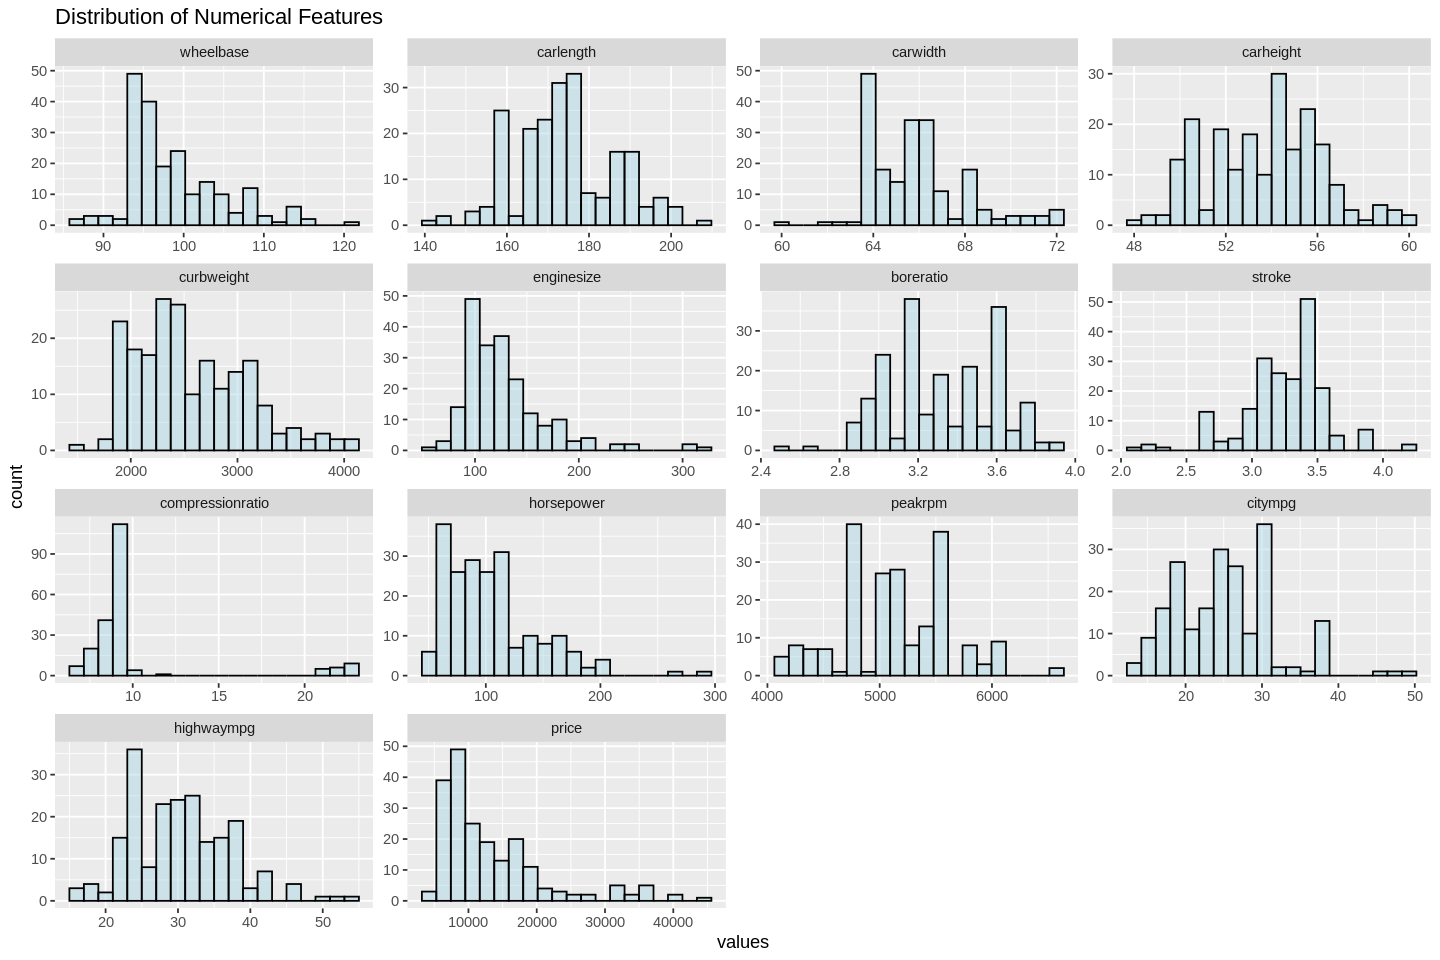

In [ ]:
library(ggplot2)

# Define numerical features
numerical_features <- c('wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                        'peakrpm', 'citympg', 'highwaympg', 'price')

# Create plots for numerical features using facet_wrap
p <- ggplot(stack(car_data[numerical_features]), aes(x = values)) +
  geom_histogram(bins = 20, fill = "lightblue", color = "black", alpha = 0.5) +
  labs(title = "Distribution of Numerical Features") +
  facet_wrap(~ ind, scales = "free")

# Set plot size
options(repr.plot.width=12, repr.plot.height=8)

# Display the plot
print(p)


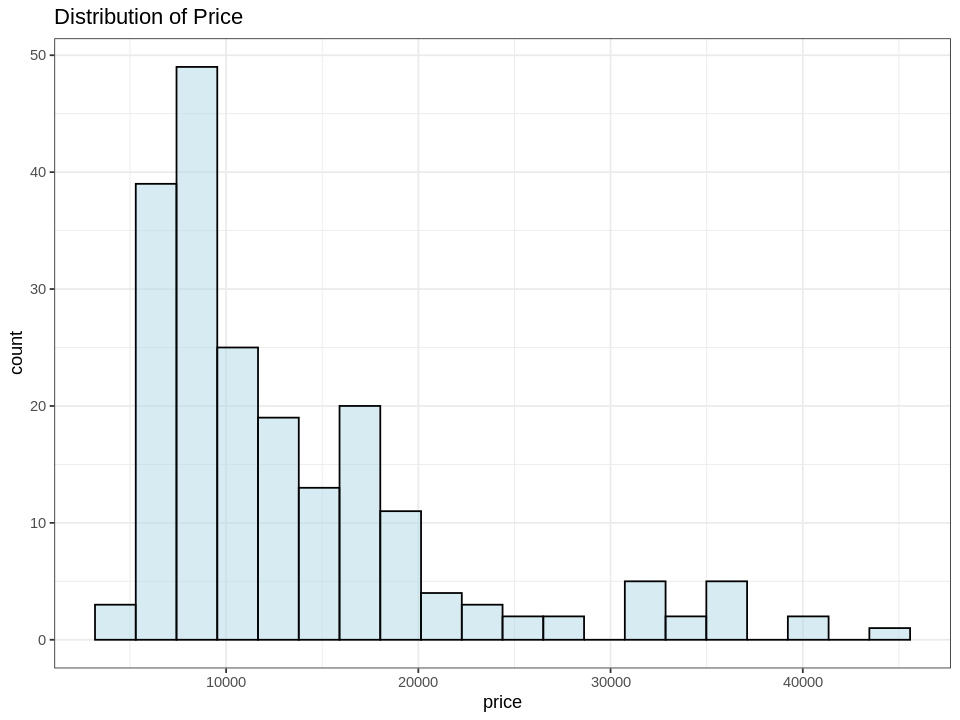

In [ ]:
# Create histogram plot for price
p <- ggplot(car_data, aes(x = price)) +
  geom_histogram(bins = 20, fill = "lightblue", color = "black", alpha = 0.5) +
  labs(title = "Distribution of Price")

# Set plot size
options(repr.plot.width=8, repr.plot.height=6)

# Display the plot
print(p)

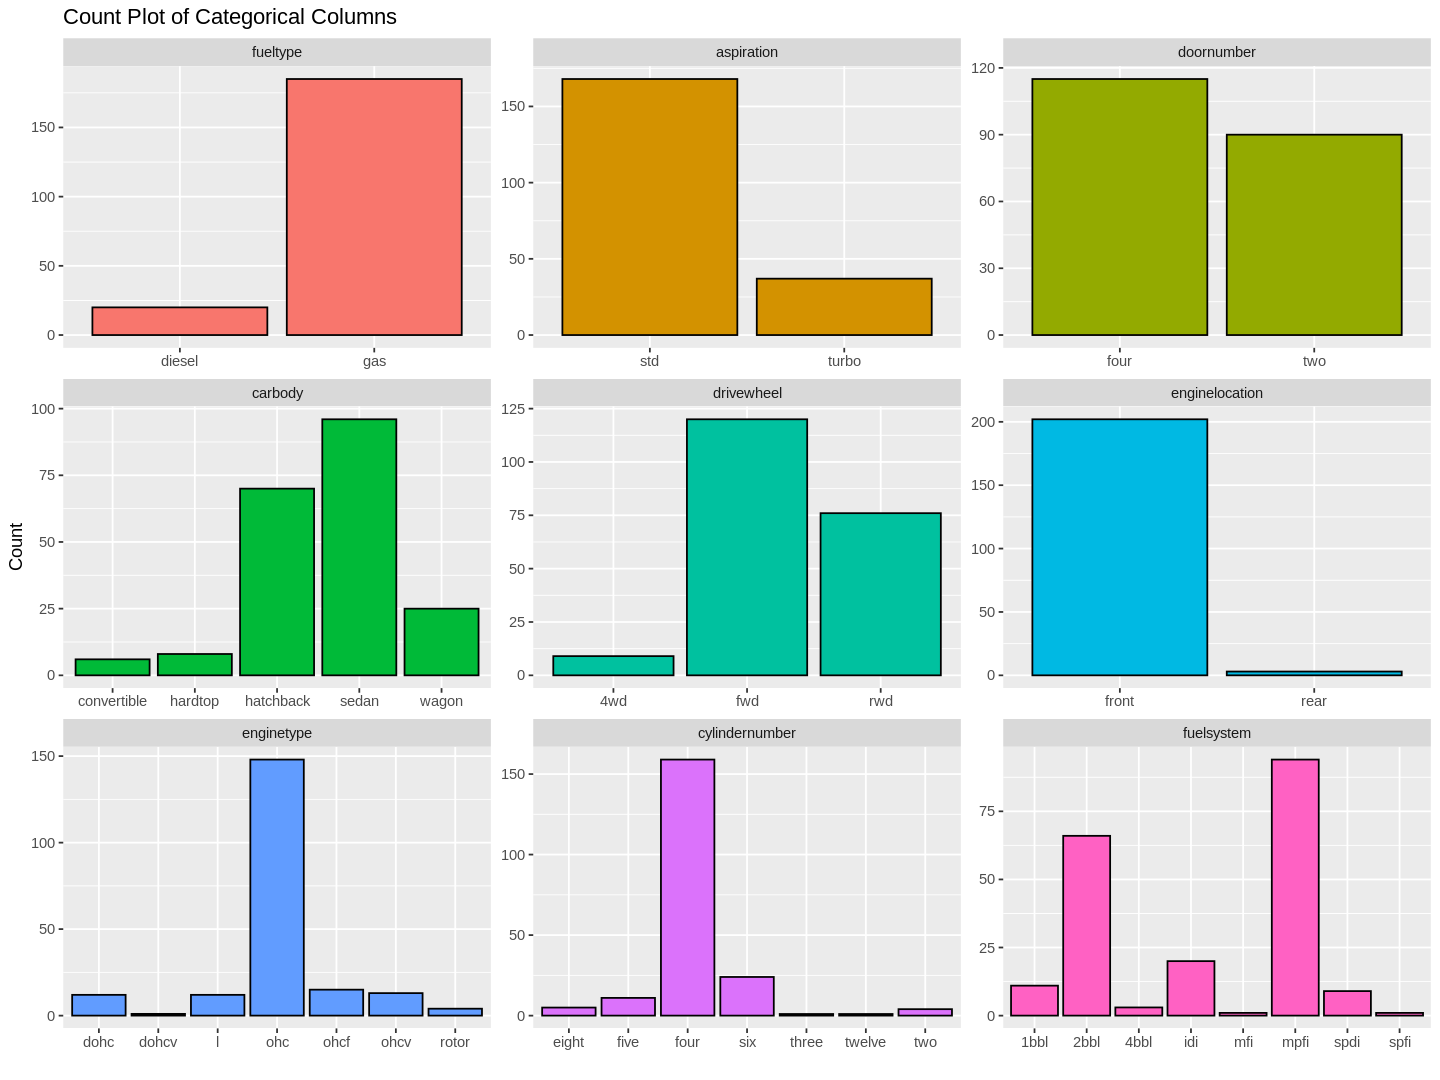

In [ ]:
library(ggplot2)

# Define the list of categorical columns to analyze
categorical_columns <- c('fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                         'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem')

# Create subplots using facet_wrap
p <- ggplot(stack(car_data[categorical_columns]), aes(x = values, fill = ind)) +
  geom_bar(position = "dodge", color = "black") +
  labs(title = "Count Plot of Categorical Columns", x = "", y = "Count") +
  facet_wrap(~ ind, scales = "free") +
  theme(legend.position = "none") +  # Remove legend
  guides(fill=none)  # Remove legend guide

# Set plot size
options(repr.plot.width=12, repr.plot.height=9)

# Display the plot
print(p)


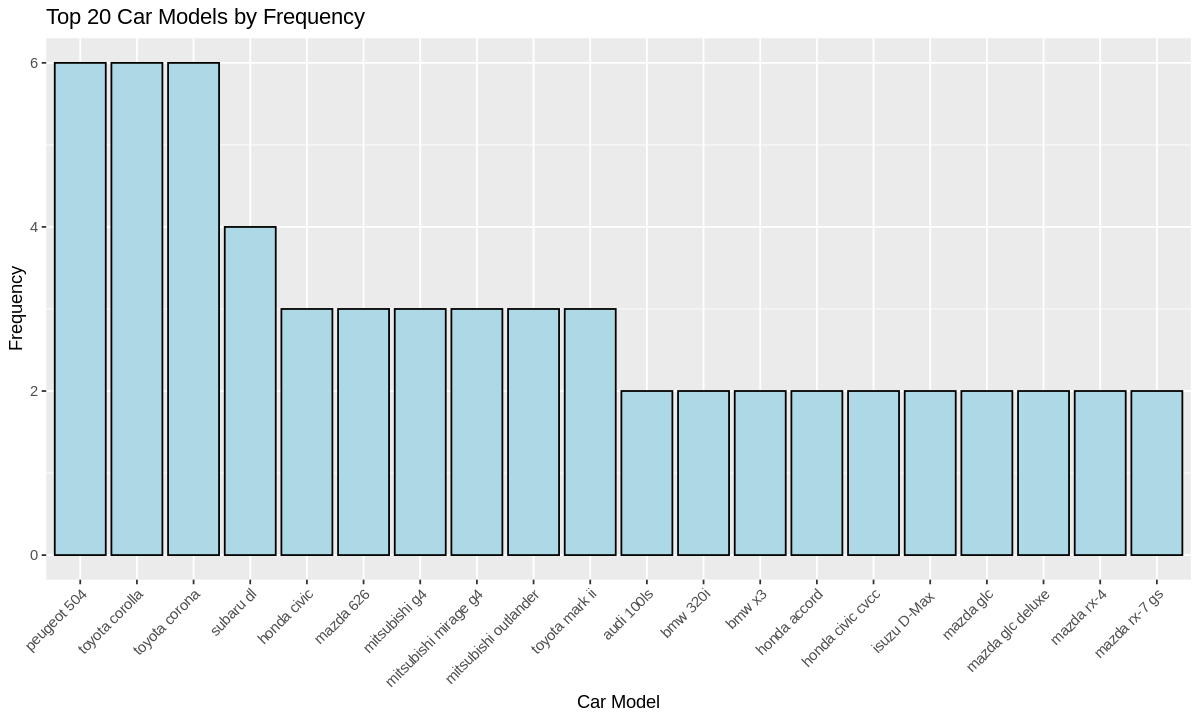

In [ ]:
library(ggplot2)

# Define the number of top car models to plot
n <- 20

# Get the top car models by frequency
top_car_models <- names(head(sort(table(car_data$CarName), decreasing = TRUE), n))

# Filter the data frame to include only the top car models
car_data_filtered <- car_data[car_data$CarName %in% top_car_models, ]

# Create the bar plot
p <- ggplot(car_data_filtered, aes(x = reorder(CarName, -table(CarName)[CarName]))) +
  geom_bar(fill = "lightblue", color = "black") +
  labs(title = paste("Top", n, "Car Models by Frequency"),
       x = "Car Model", y = "Frequency") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))

# Set plot size
options(repr.plot.width=10, repr.plot.height=6)

# Display the plot
print(p)


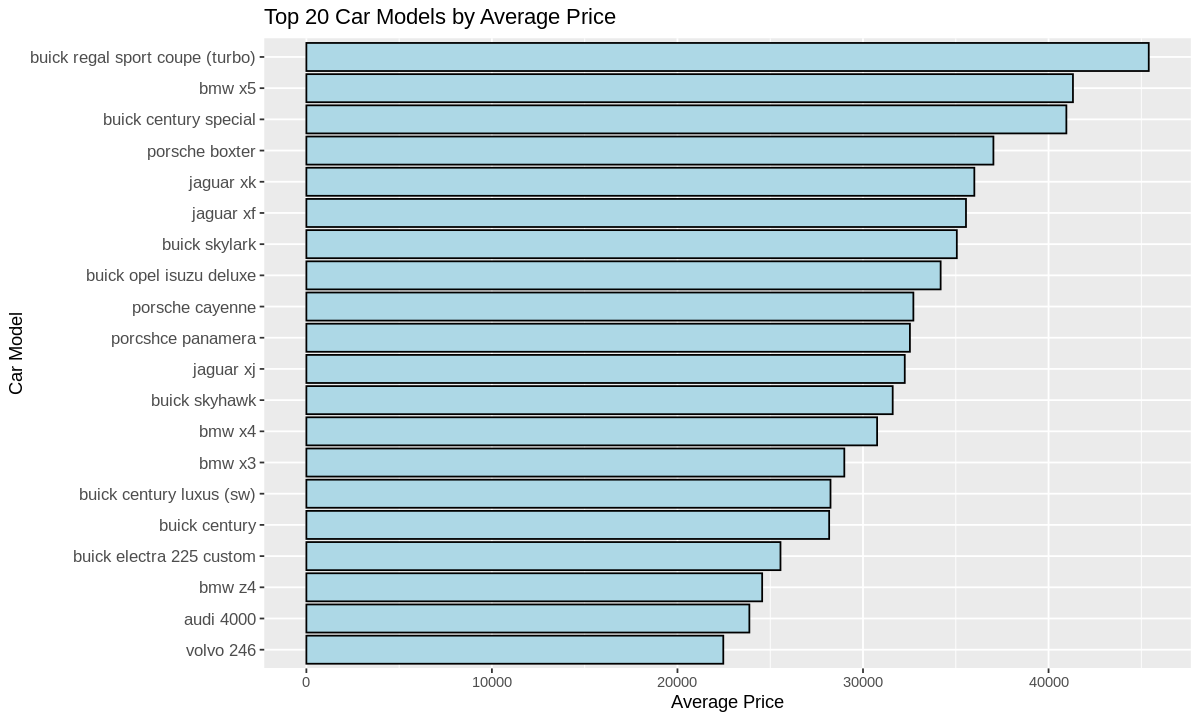

In [ ]:
library(dplyr)
library(ggplot2)

# Calculate average price for each car model
avg_prices_by_car <- car_data %>%
  group_by(CarName) %>%
  summarise(avg_price = mean(price)) %>%
  arrange(desc(avg_price))  # Sort by average price in descending order

# Plot top N car models by average price
n <- 20  # Number of top car models to plot
top_car_models <- head(avg_prices_by_car$CarName, n)

# Filter the data frame to include only the top car models
avg_prices_filtered <- avg_prices_by_car[avg_prices_by_car$CarName %in% top_car_models, ]

# Create the bar plot
p <- ggplot(avg_prices_filtered, aes(x = avg_price, y = reorder(CarName, avg_price))) +
  geom_bar(stat = "identity", fill = "lightblue", color = "black") +
  labs(title = paste("Top", n, "Car Models by Average Price"),
       x = "Average Price", y = "Car Model") +
  theme(axis.text.y = element_text(size=10))

# Set plot size
options(repr.plot.width=10, repr.plot.height=6)

# Display the plot
print(p)


[[1]]

[[2]]


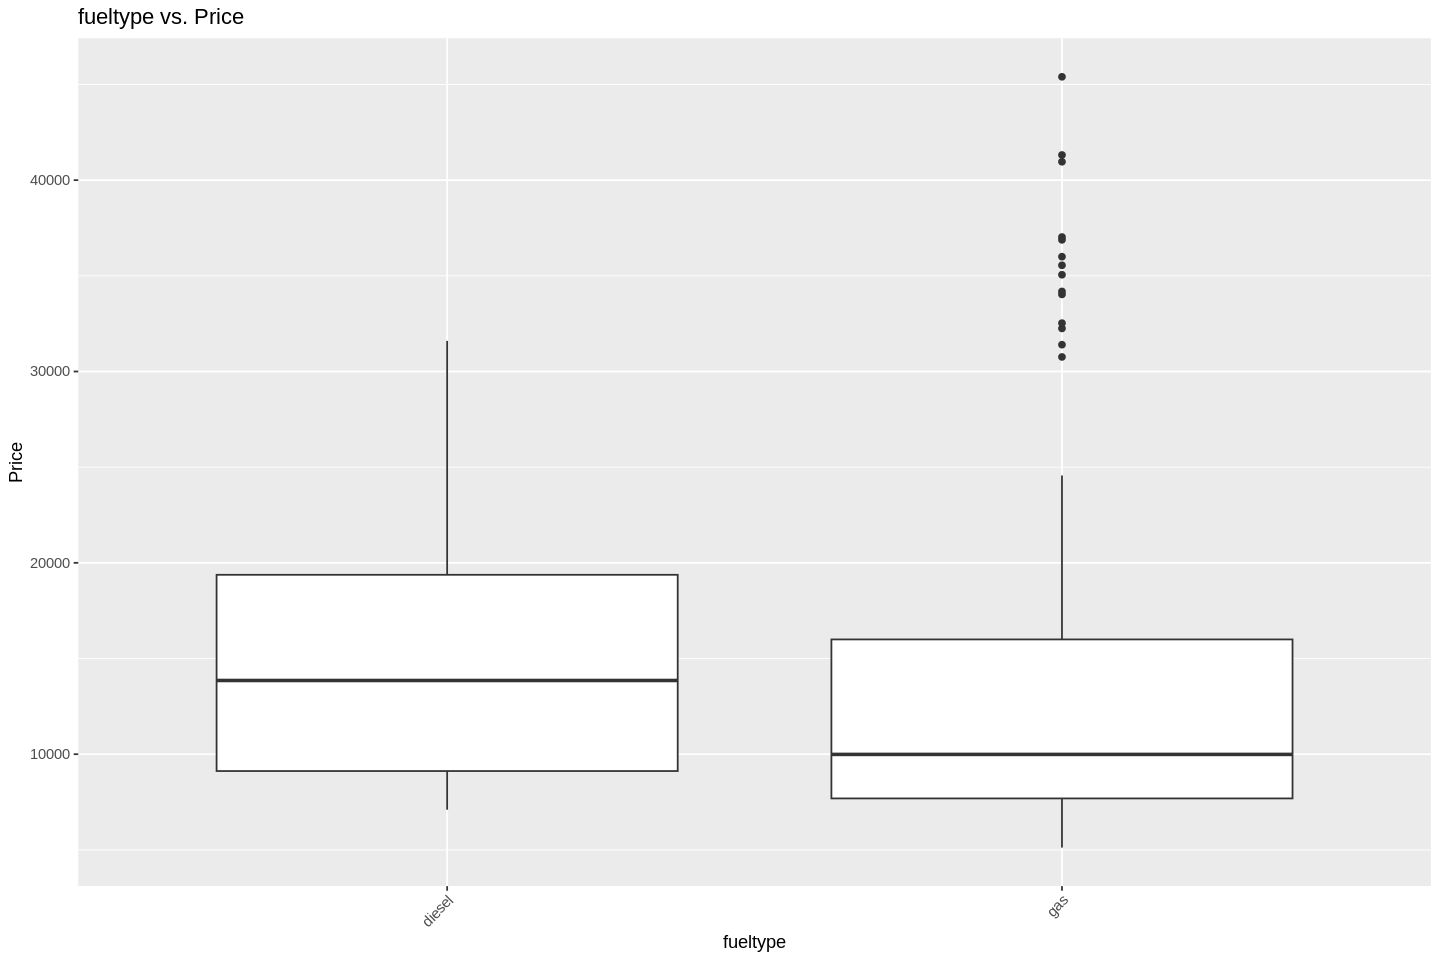


[[3]]


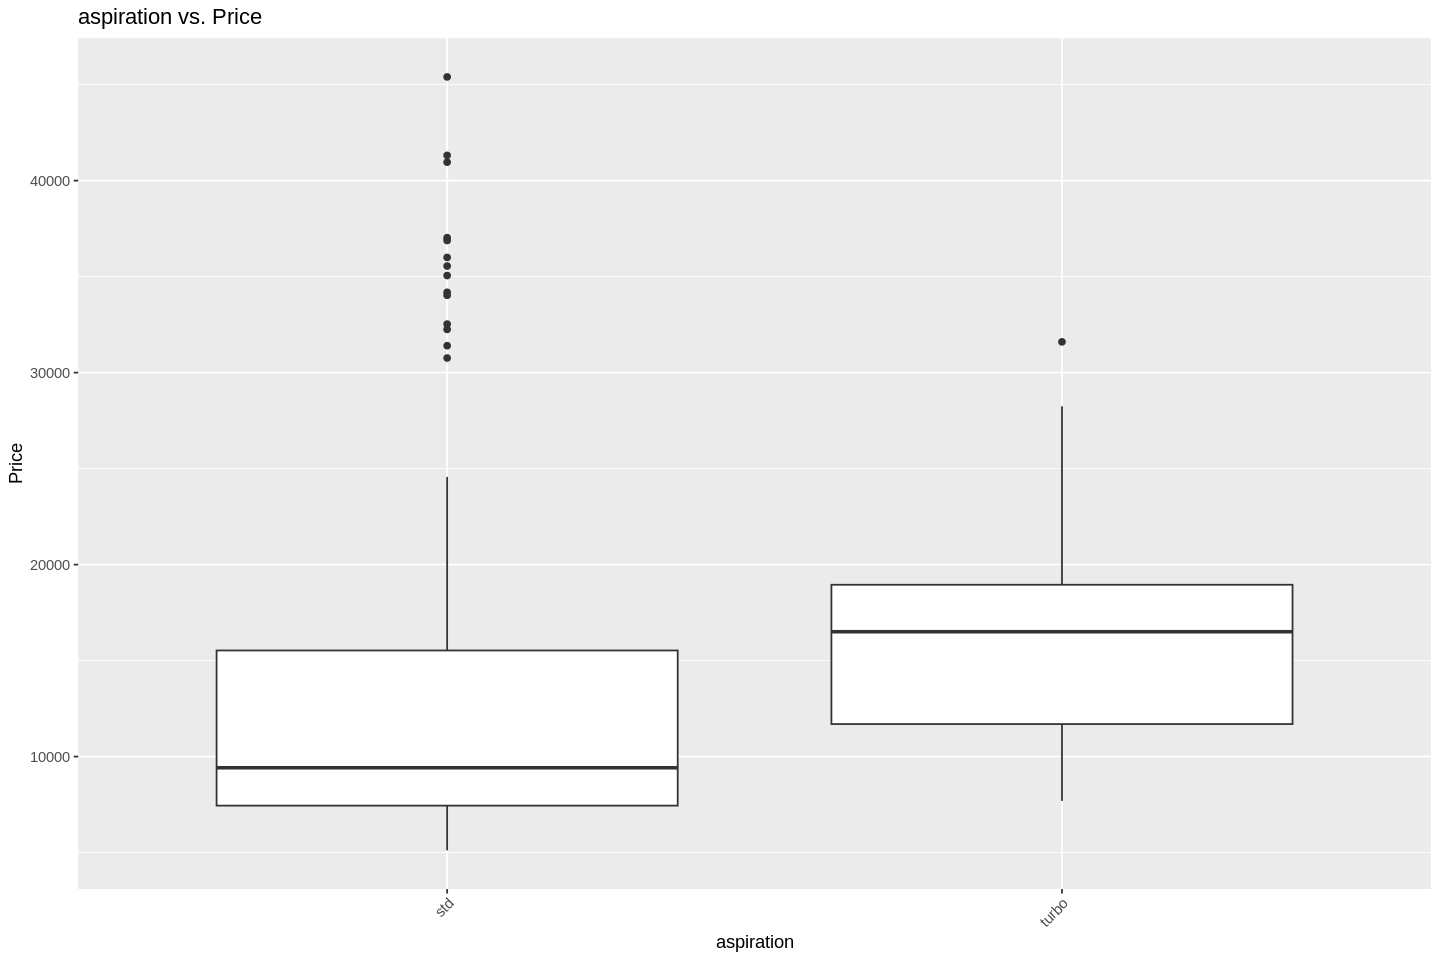


[[4]]


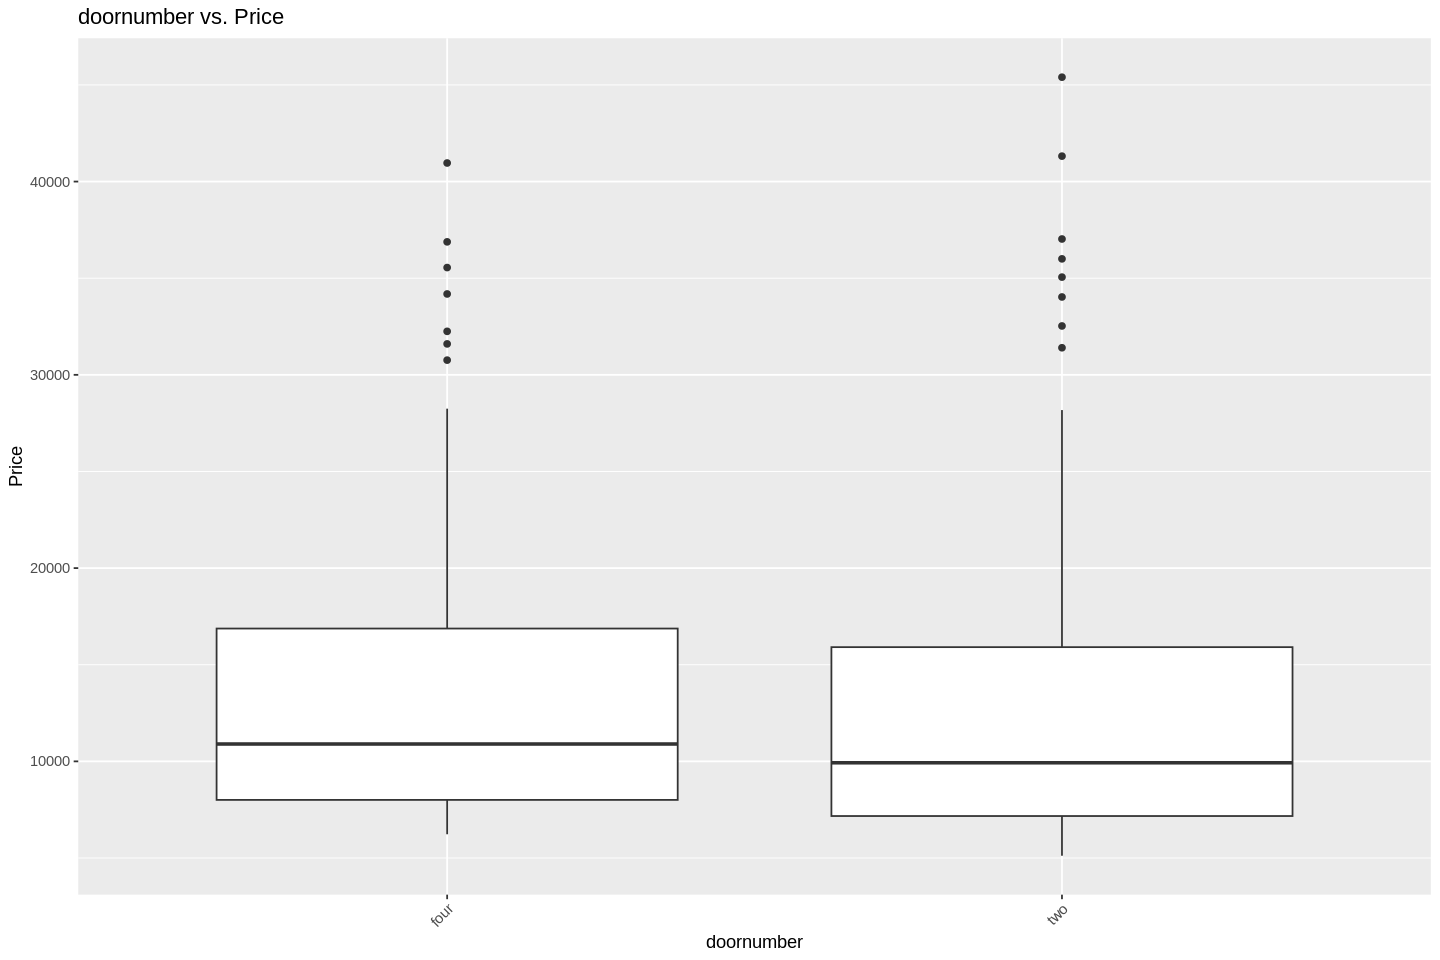


[[5]]


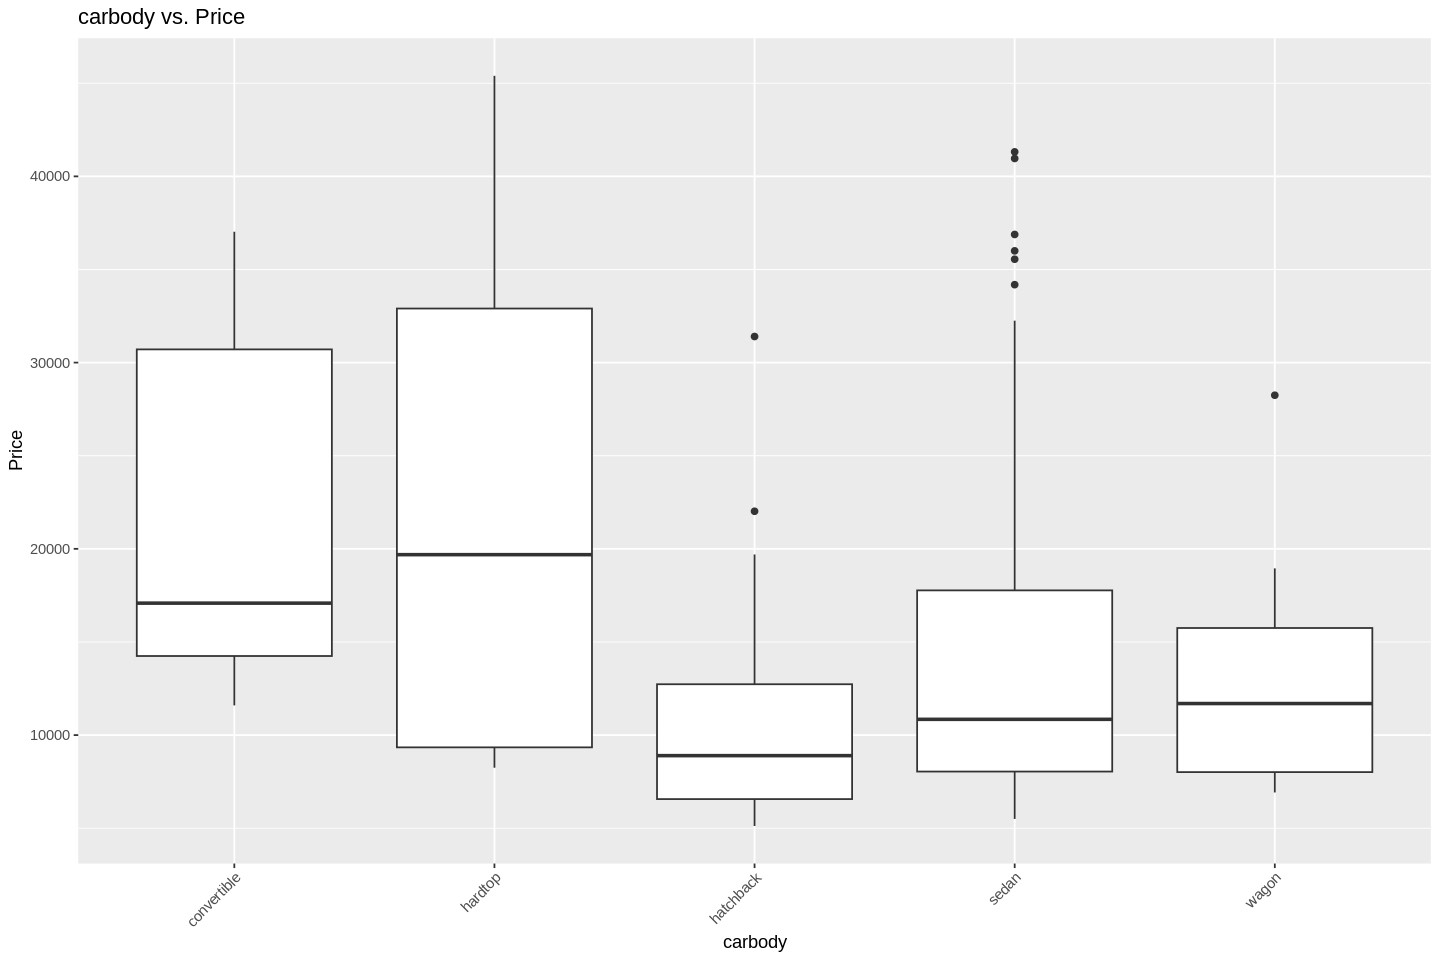


[[6]]


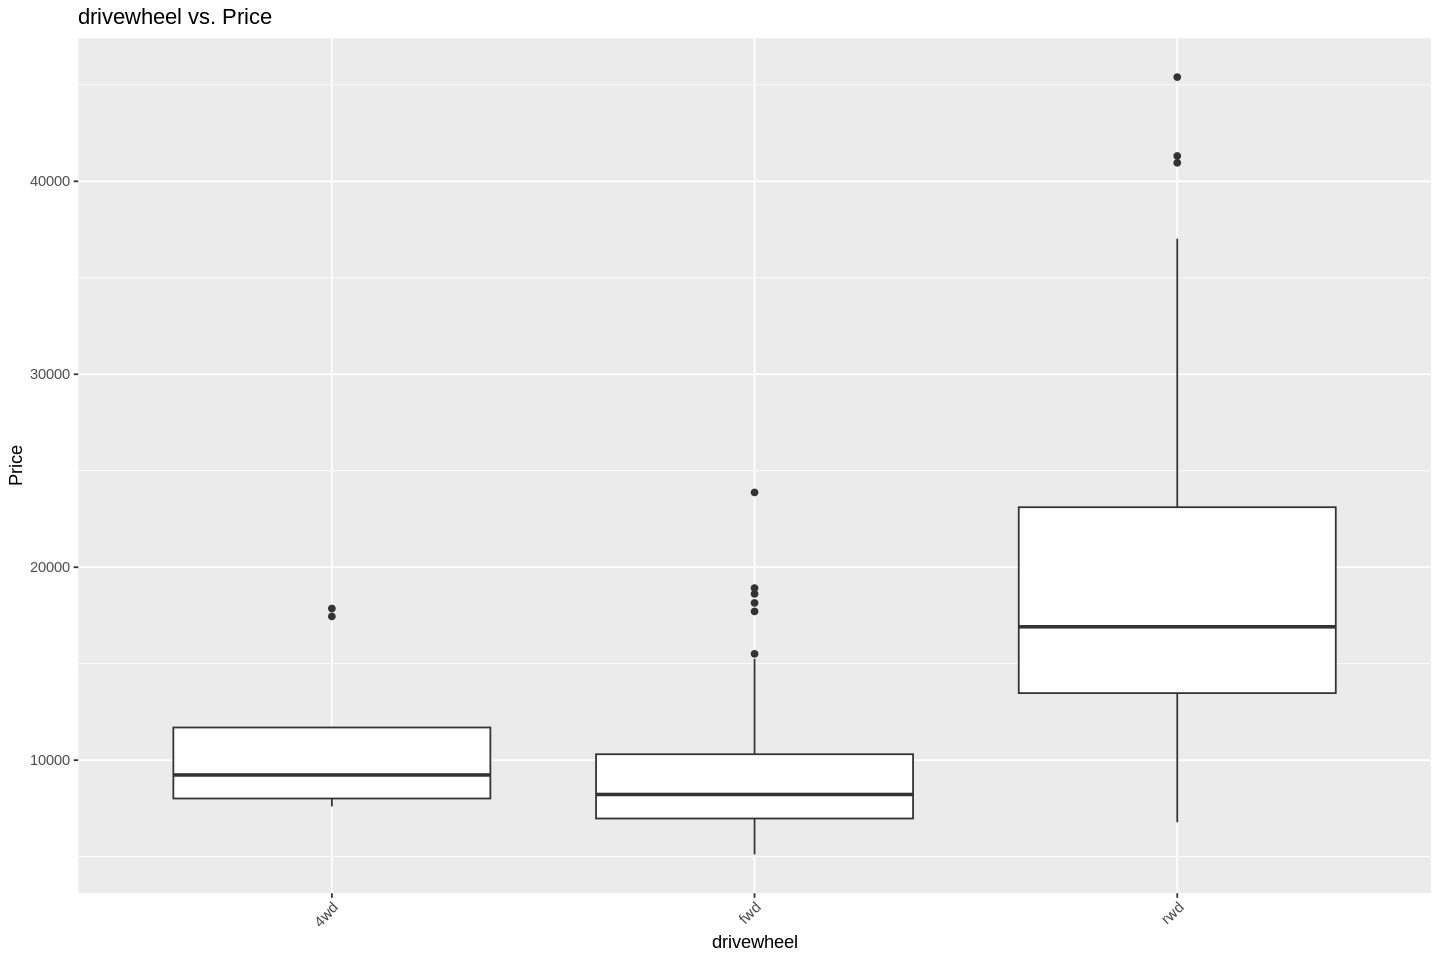


[[7]]


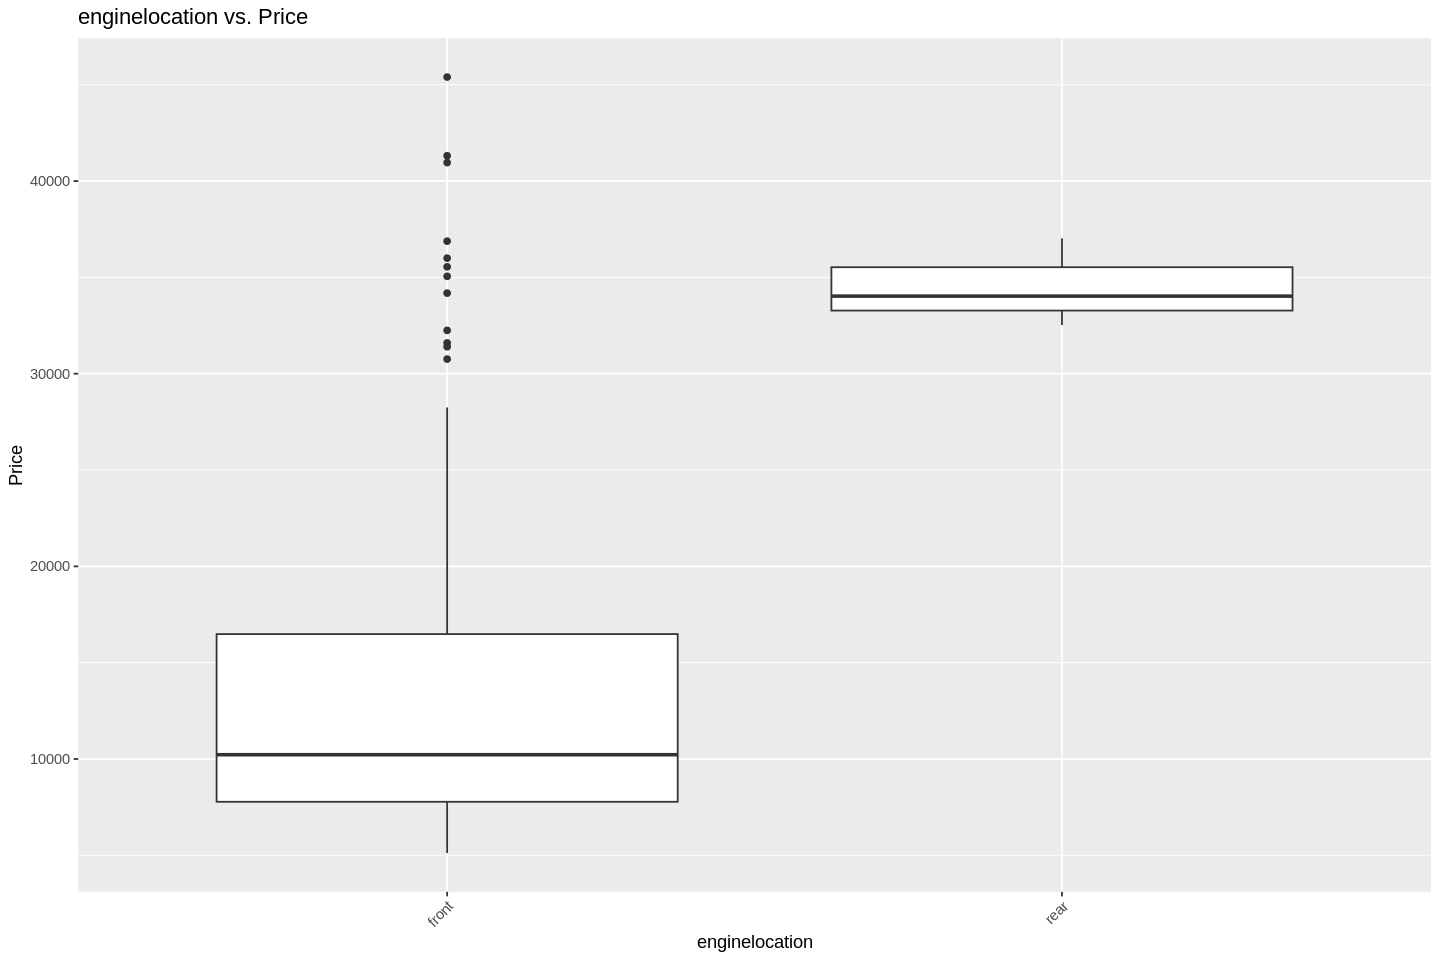


[[8]]


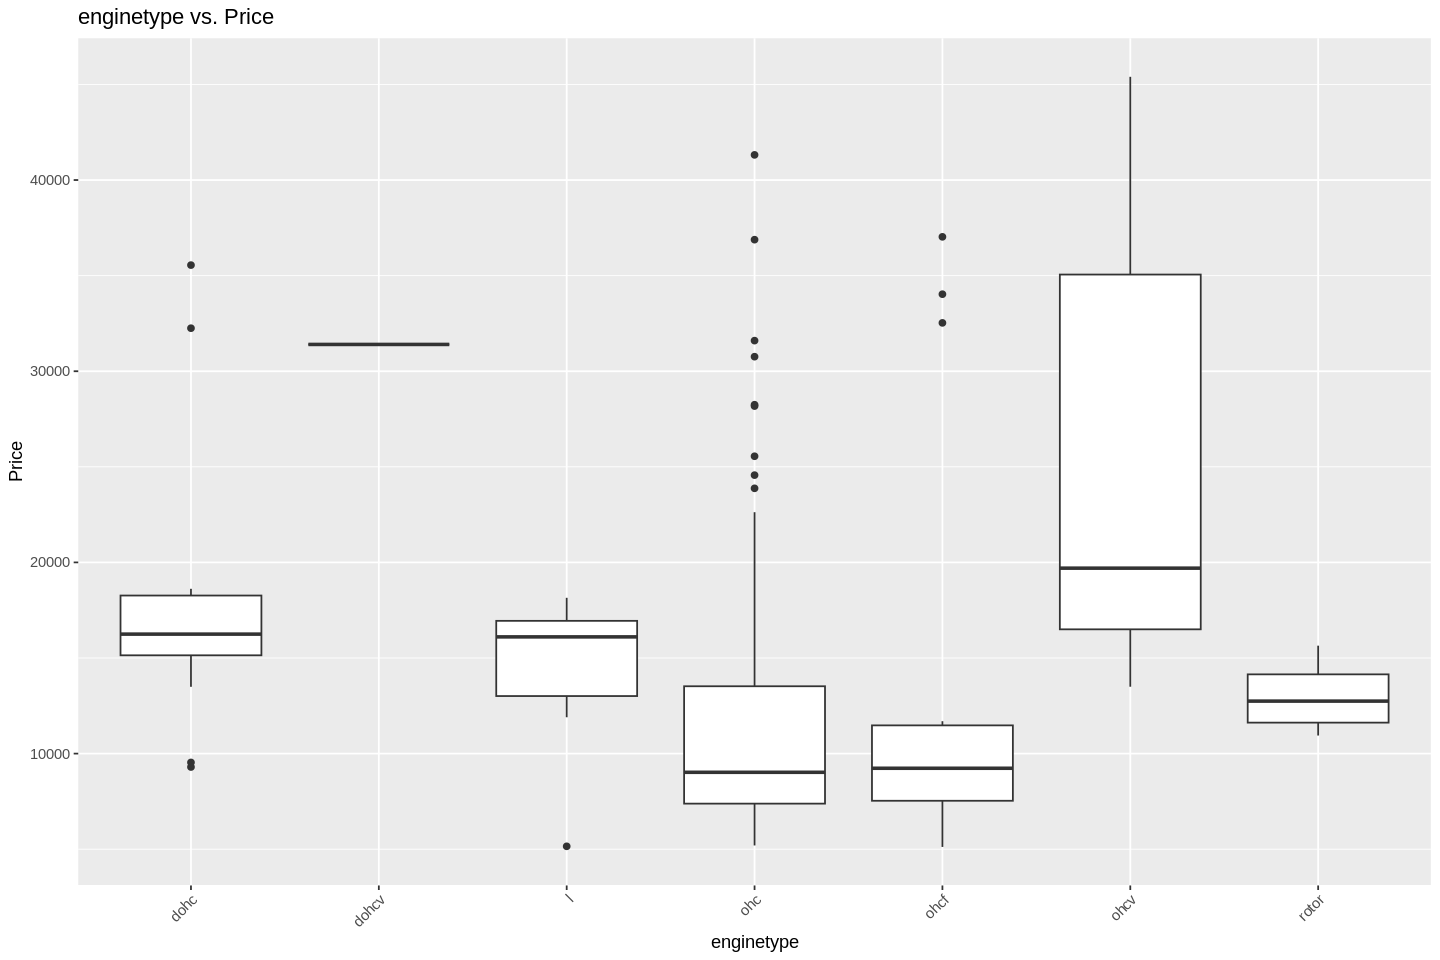


[[9]]


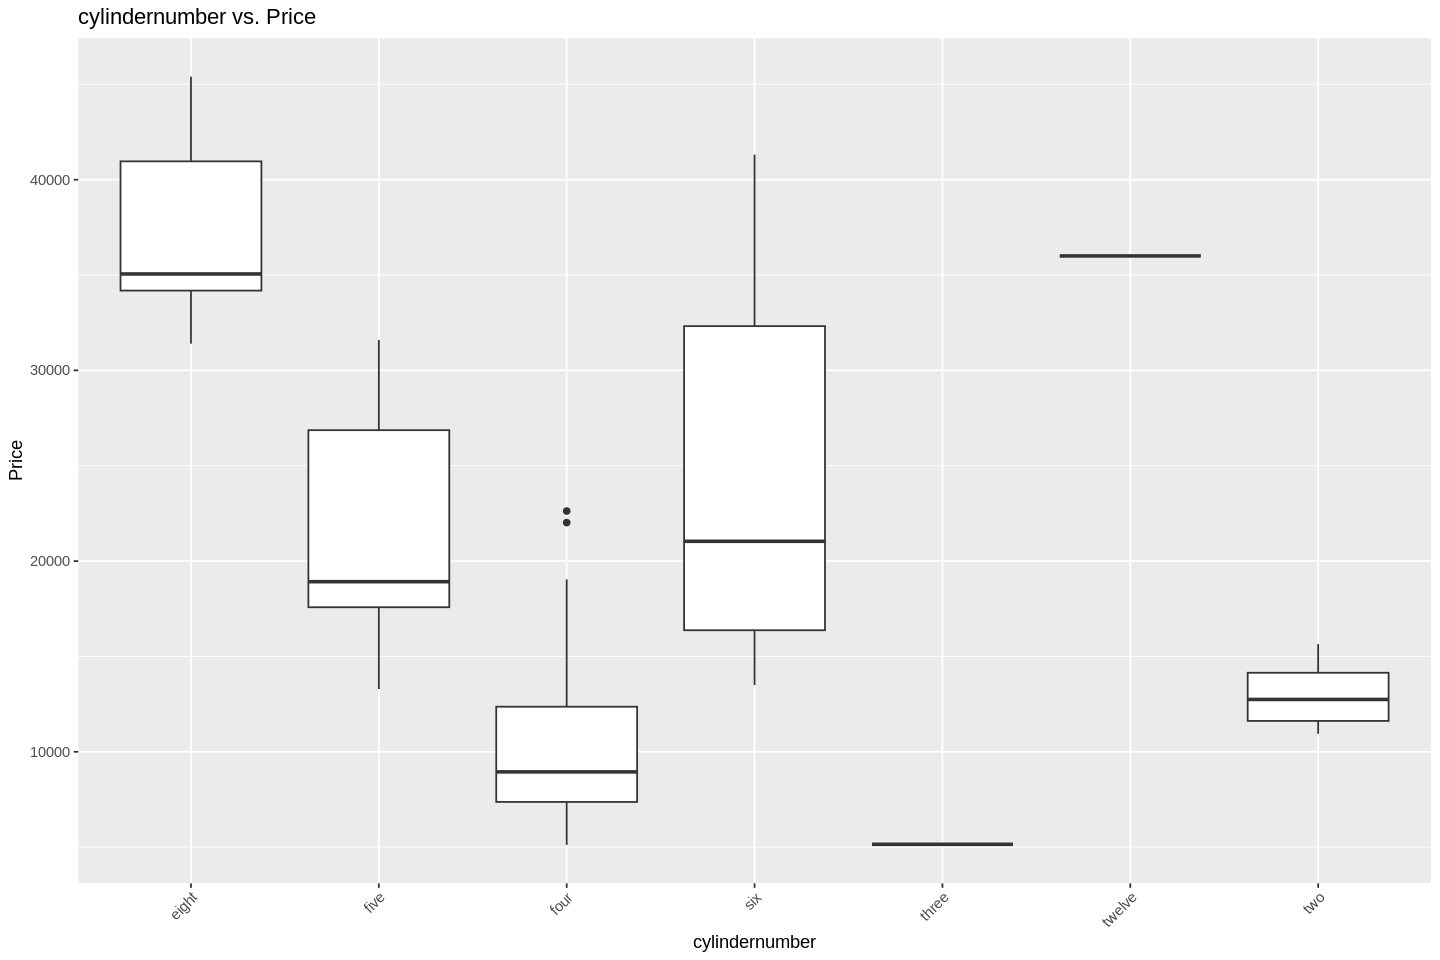

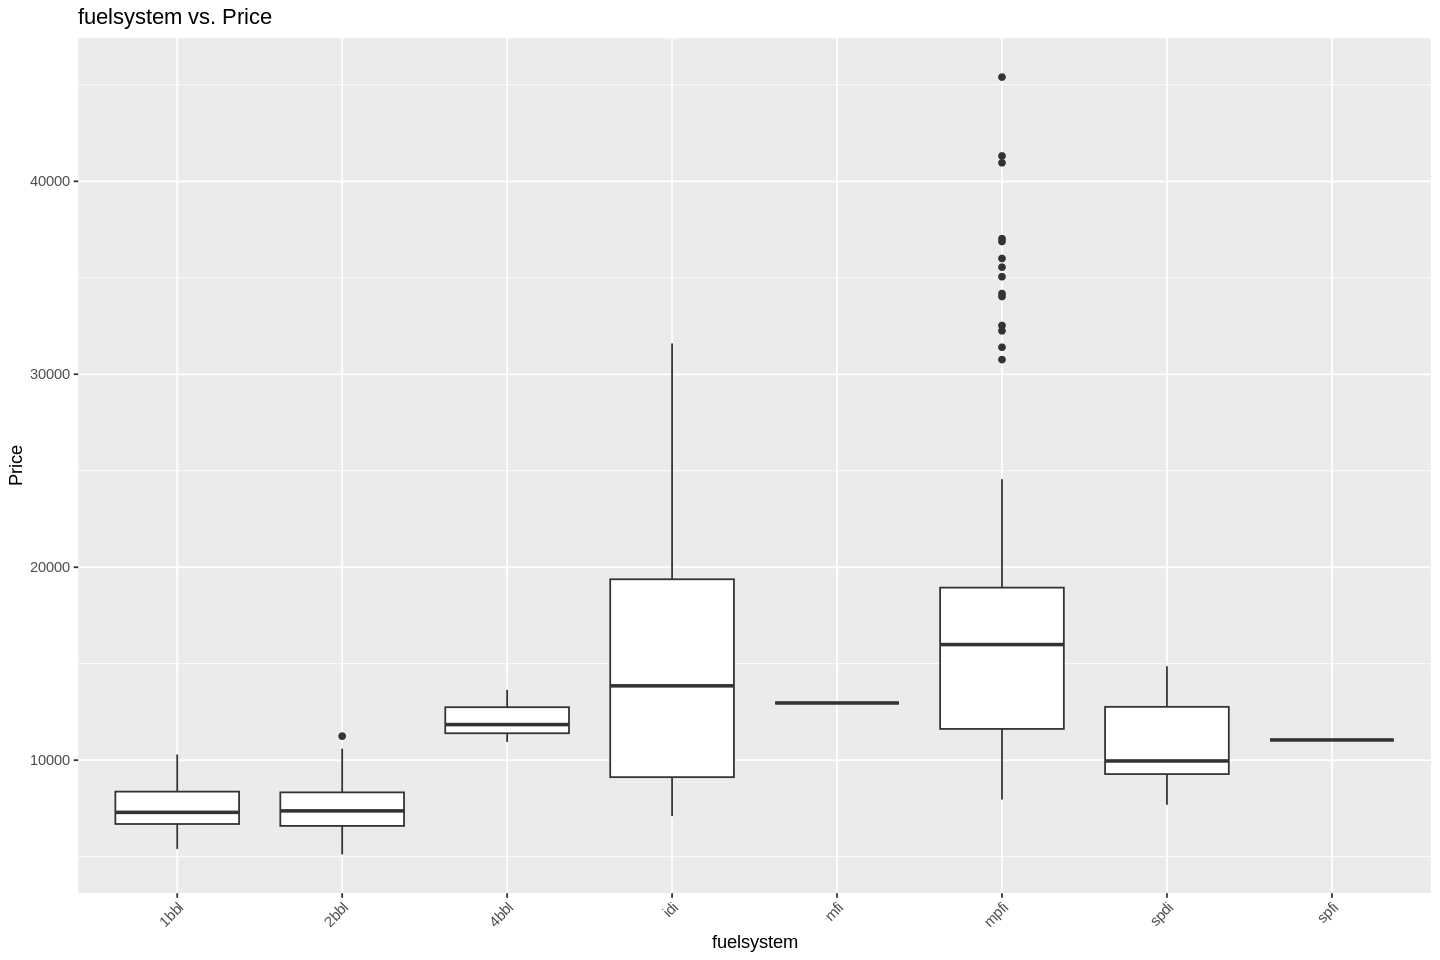

In [ ]:
library(ggplot2)

# Define the categorical columns
categorical_columns <- c('fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                         'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem')

# Create subplots using facet_wrap
p <- lapply(categorical_columns, function(col) {
  ggplot(car_data, aes_string(x = col, y = "price")) +
    geom_boxplot() +
    labs(title = paste(col, "vs. Price"),
         x = col, y = "Price") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels if needed
})

# Set plot size
options(repr.plot.width=12, repr.plot.height=8)

# Display the plots
print(p)

In [ ]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



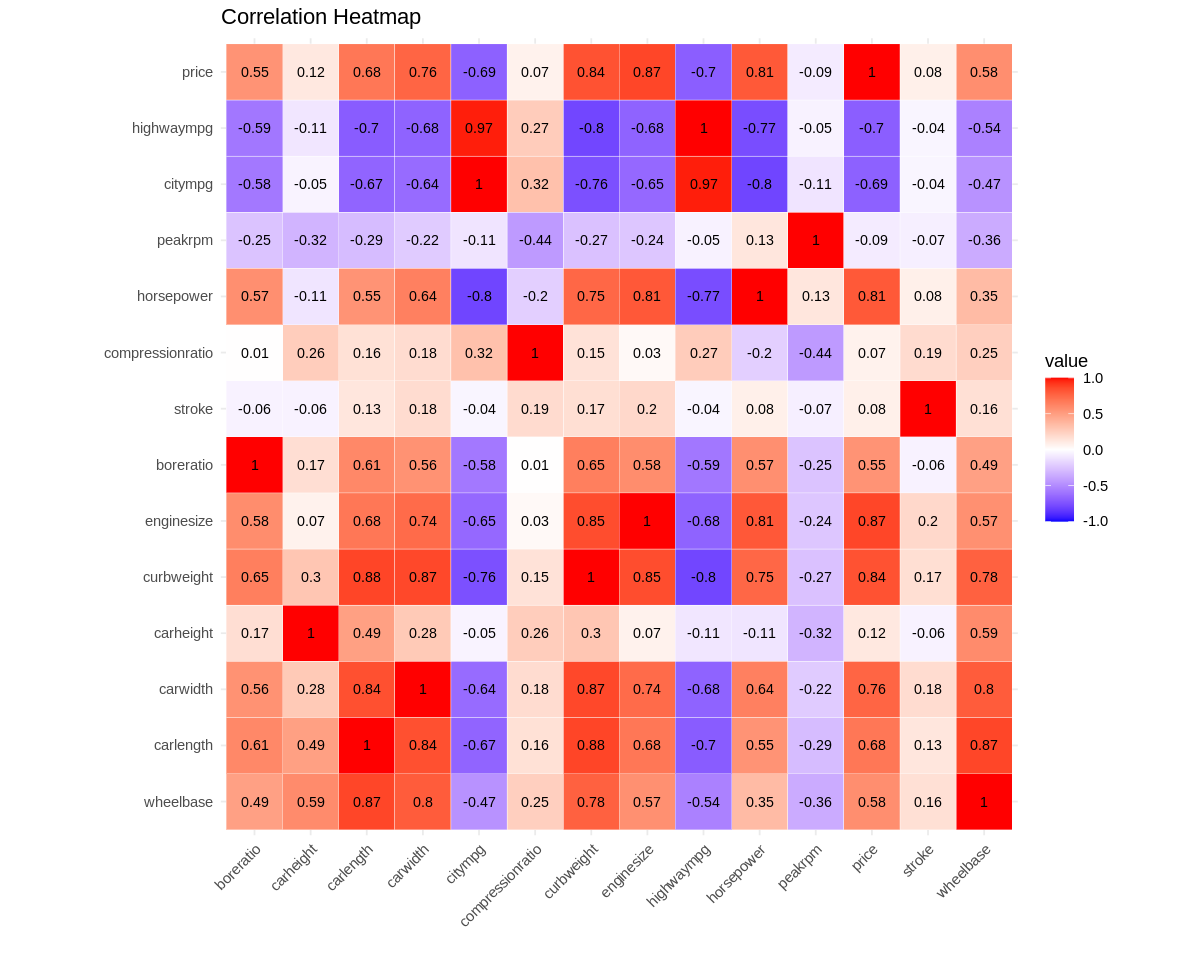

In [ ]:
# Compute the correlation matrix
correlation_matrix <- cor(car_data[, numerical_features])

# Reshape the correlation matrix
correlation_df <- as.data.frame(correlation_matrix)
correlation_df$feature <- rownames(correlation_matrix)
correlation_df <- reshape2::melt(correlation_df, id.vars = "feature")

# Create the correlation heatmap using ggplot2
library(ggplot2)

ggplot(correlation_df, aes(x = feature, y = variable, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limit = c(-1, 1)) +
  geom_text(aes(label = round(value, 2)), size = 3) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Correlation Heatmap", x = "", y = "") +
  coord_fixed()


The variables with the highest correlation with price are enginesize, curbweight, horsepower, citympg, and highwaympg.

As the city and highway fuel consumption measures (mpg = miles per gallon) increase, the price significantly decreases.

As the horsepower, engine size, curb weight, width, and length of the car increase, the price also increases.

Symboling, stroke, compressionratio, and peakrpm have no effect on price.


Warning message:
“Computation failed in `stat_smooth()`
Caused by error in `poly()`:
! 'degree' must be less than number of unique points”


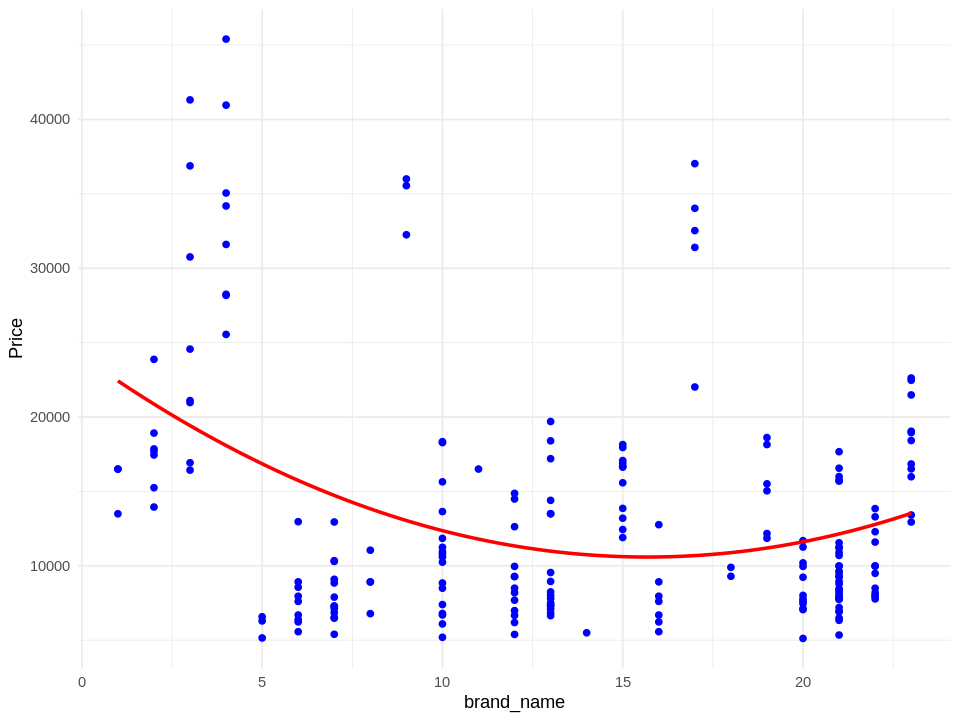

Warning message:
“Computation failed in `stat_smooth()`
Caused by error in `poly()`:
! 'degree' must be less than number of unique points”


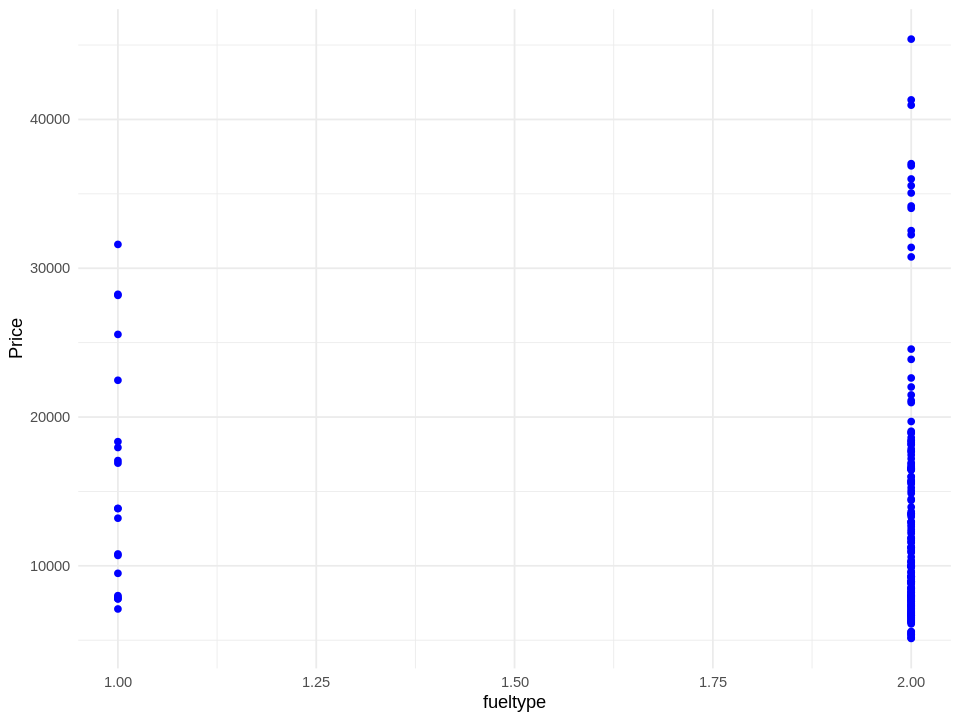

Warning message:
“Computation failed in `stat_smooth()`
Caused by error in `poly()`:
! 'degree' must be less than number of unique points”


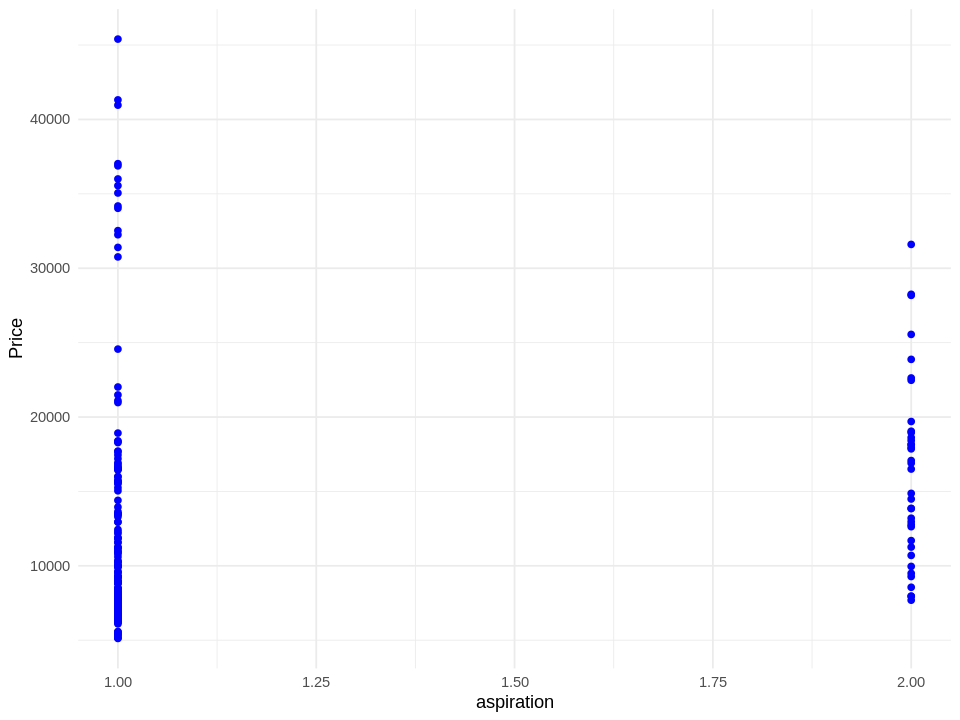

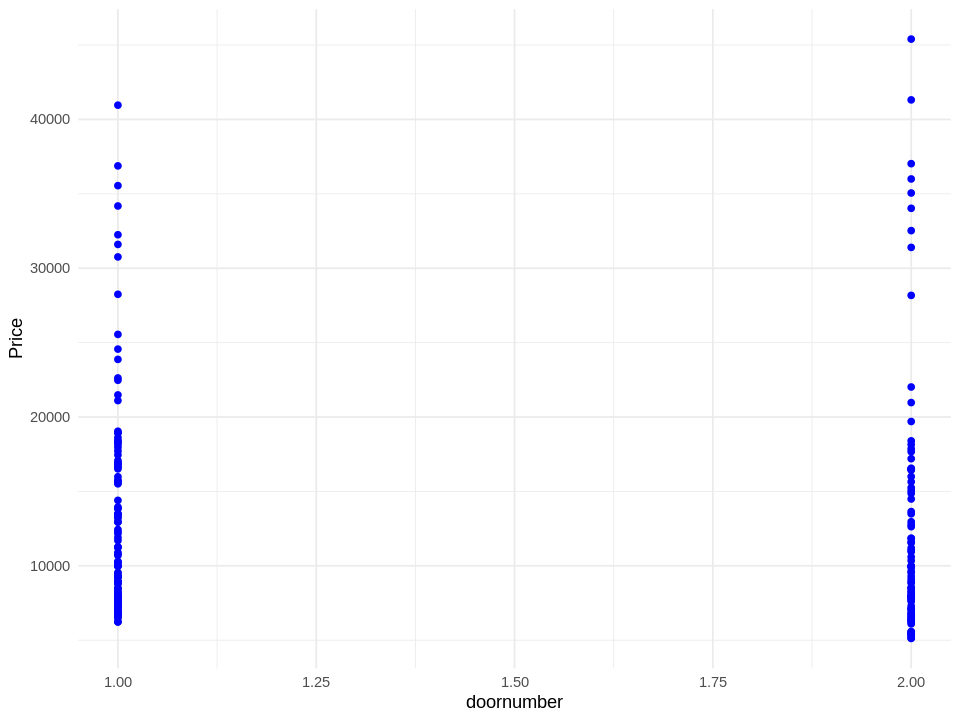

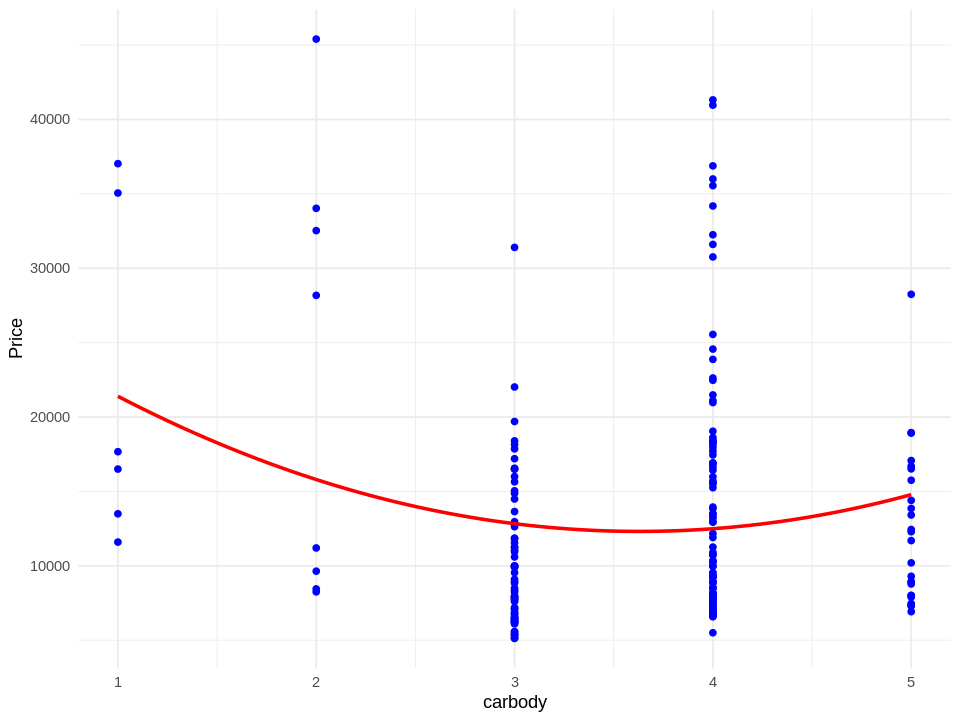

Warning message:
“Computation failed in `stat_smooth()`
Caused by error in `poly()`:
! 'degree' must be less than number of unique points”


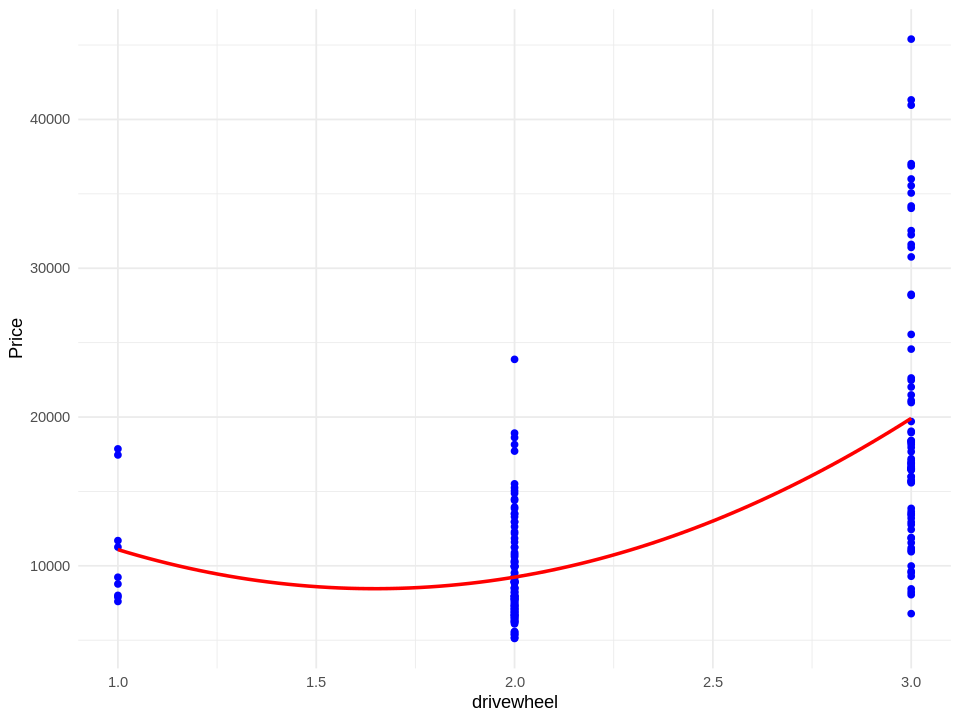

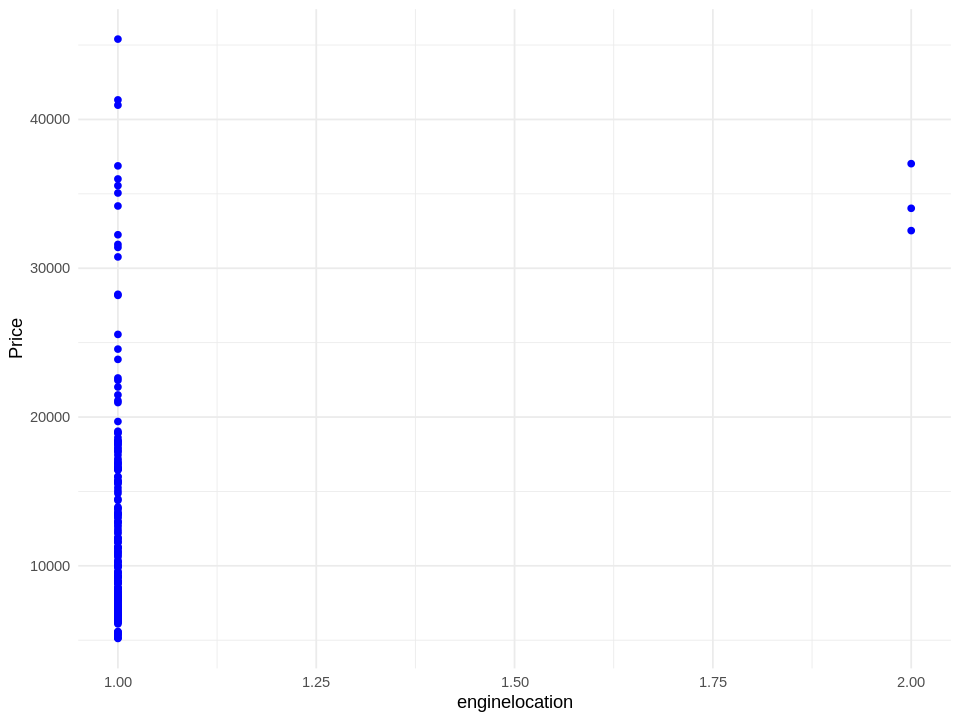

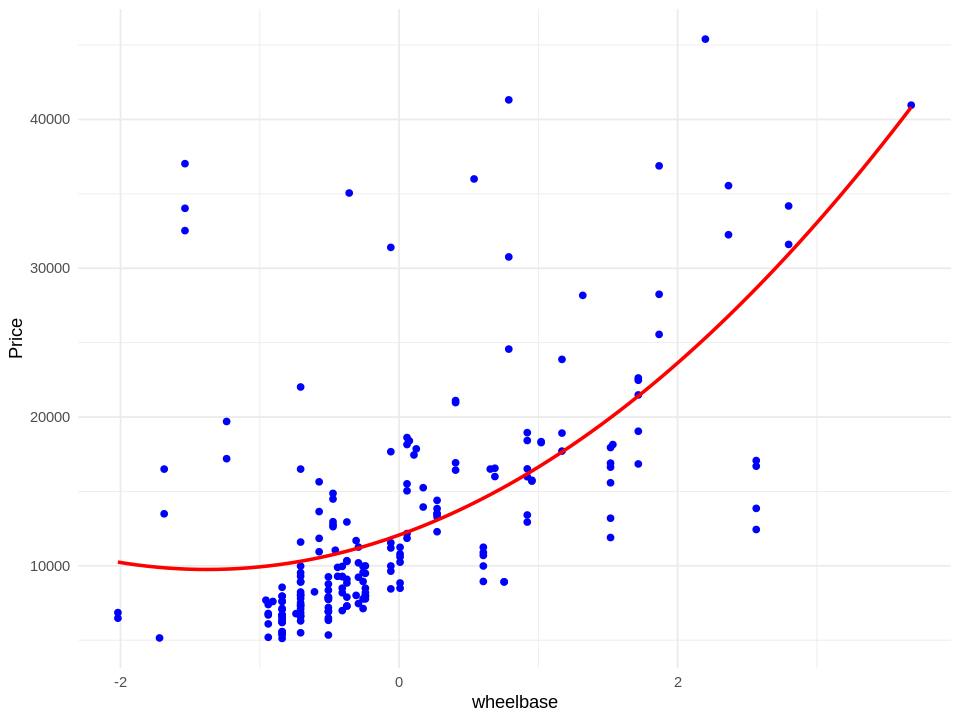

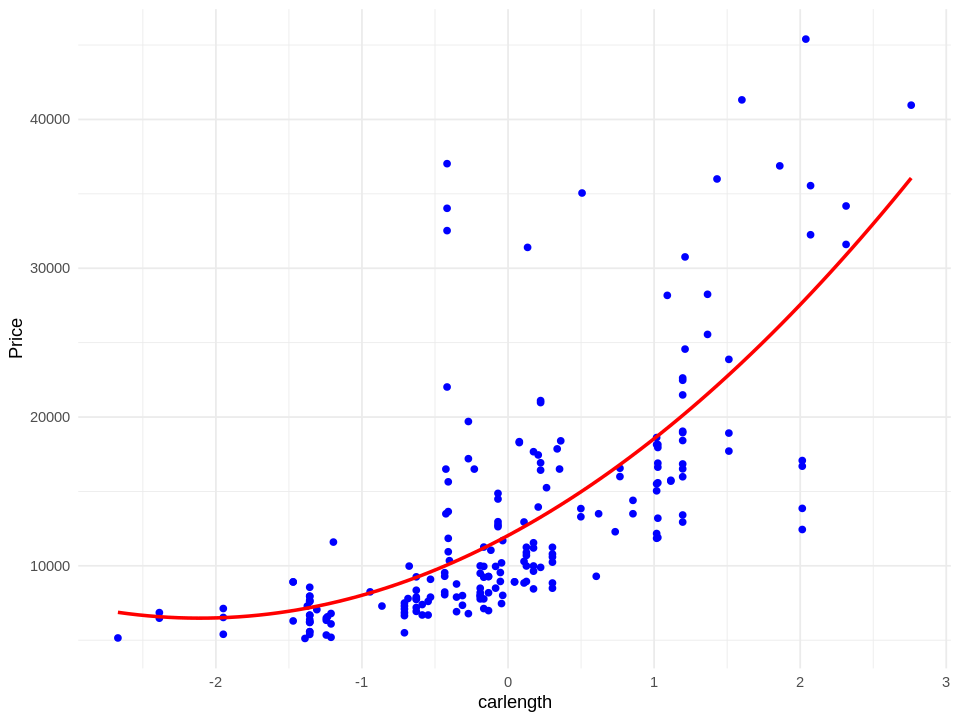

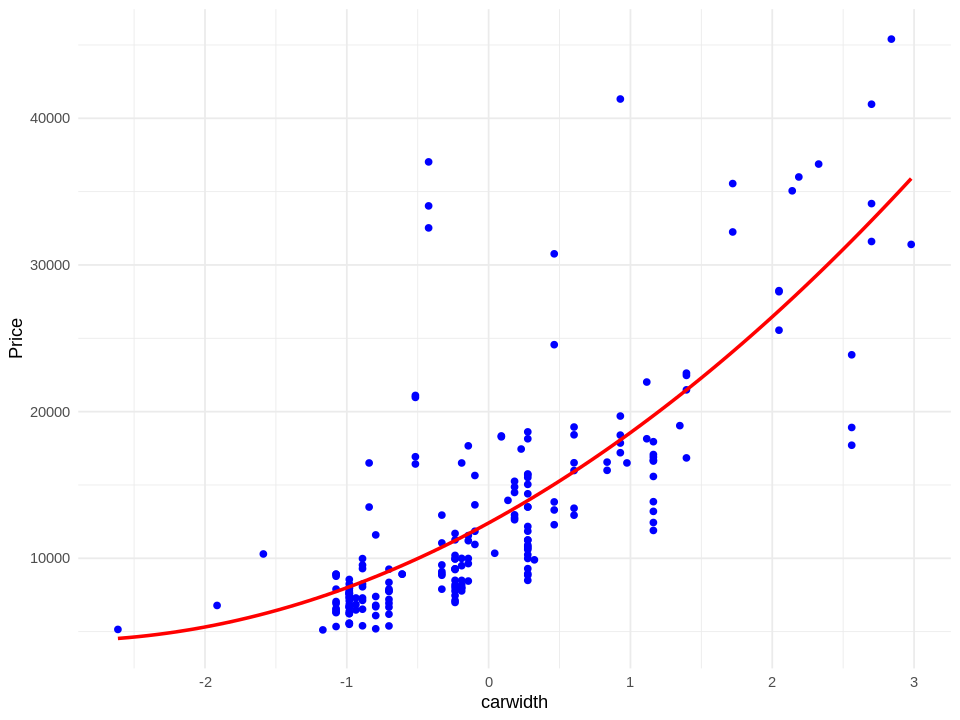

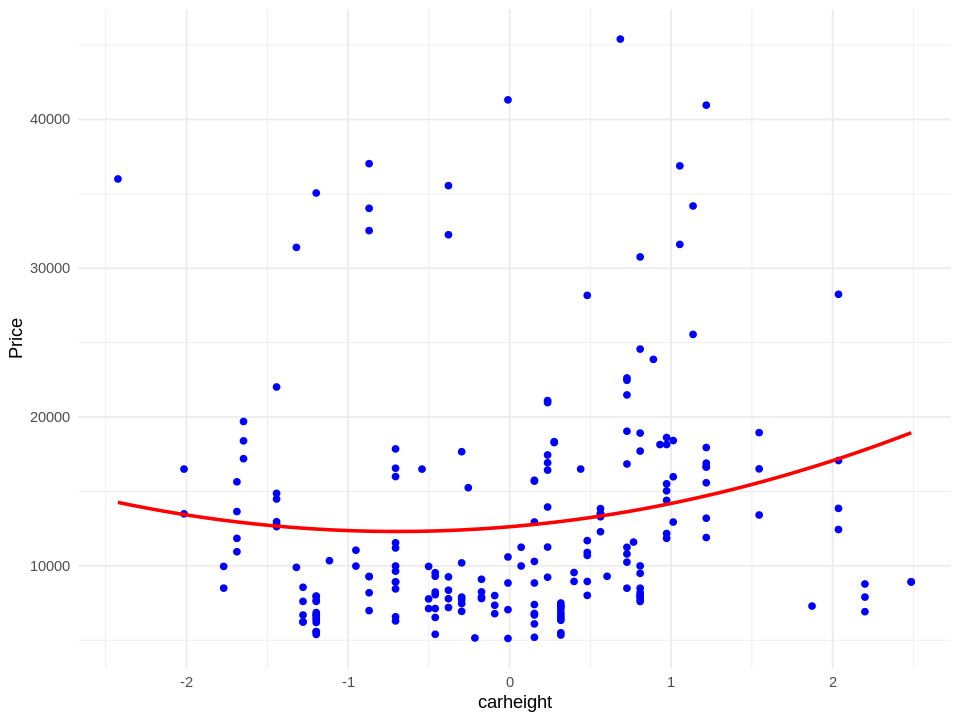

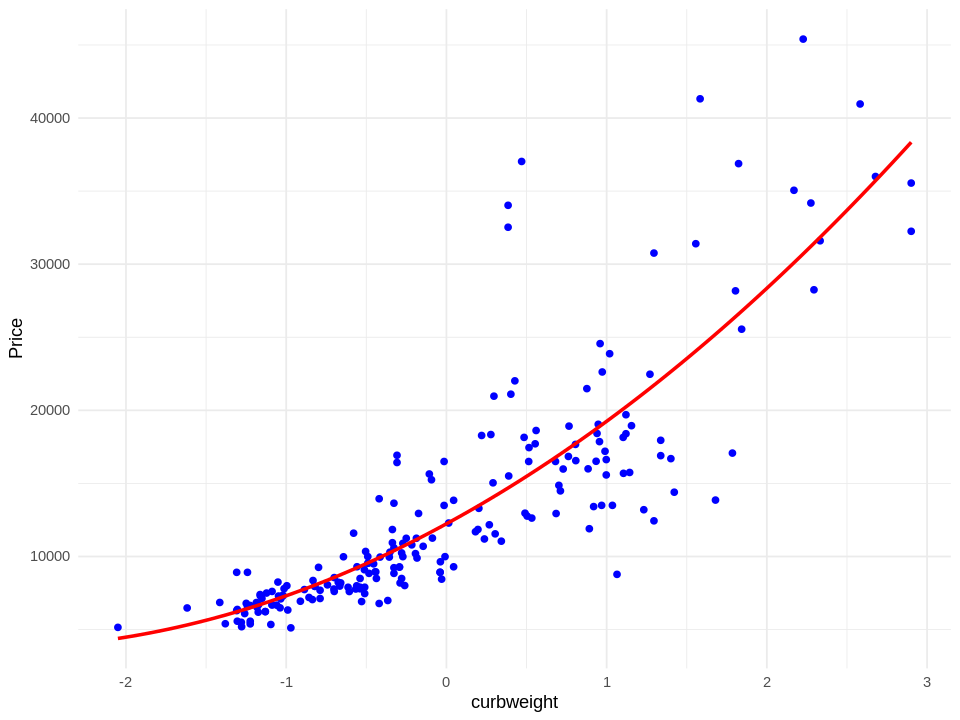

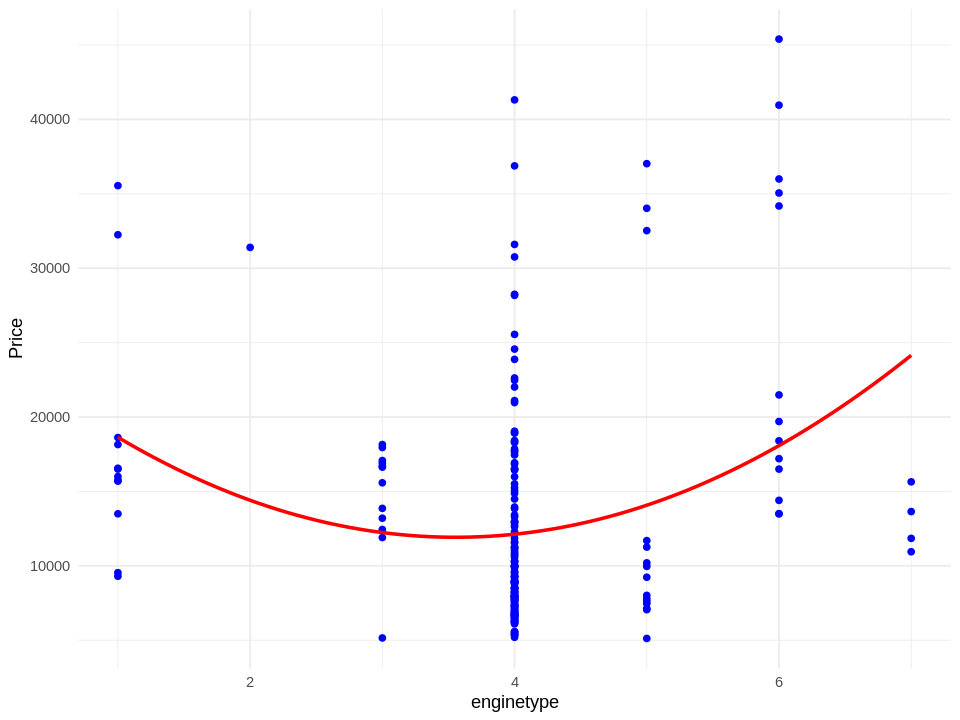

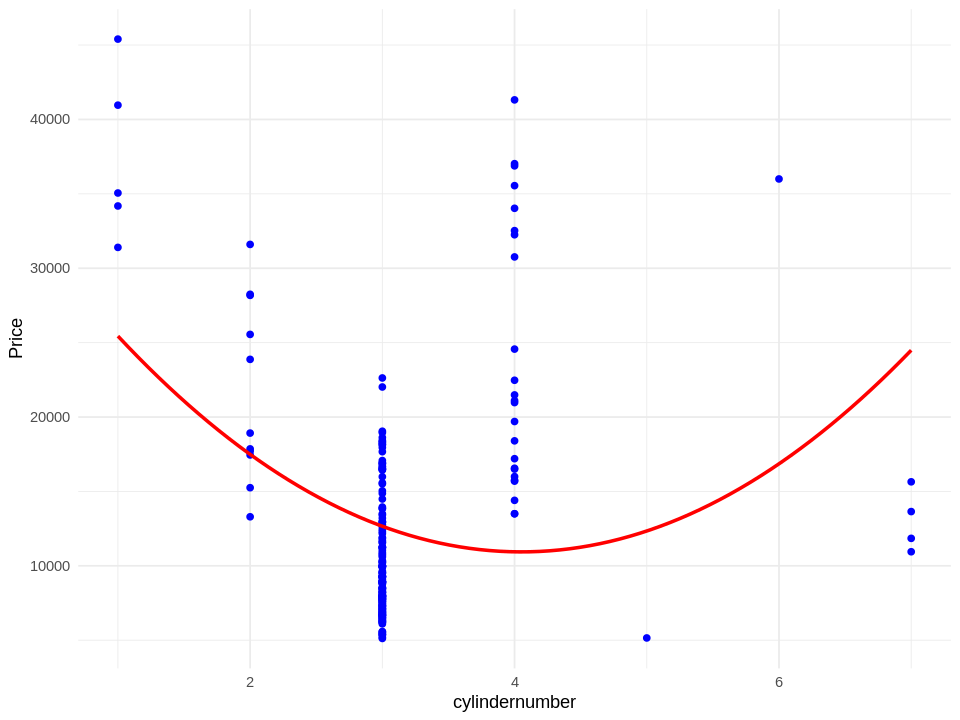

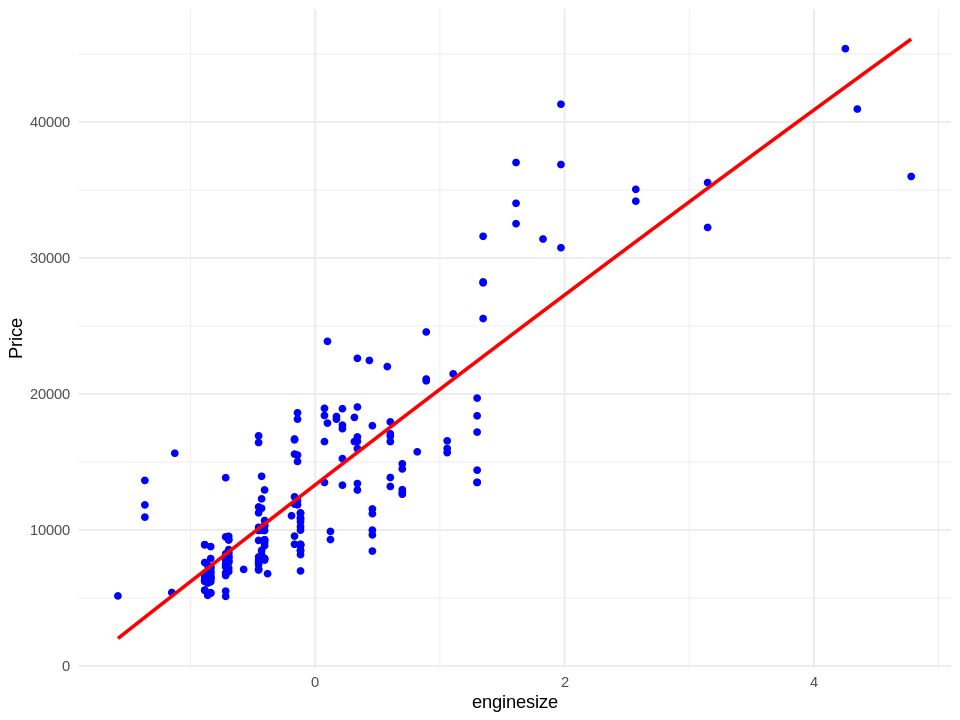

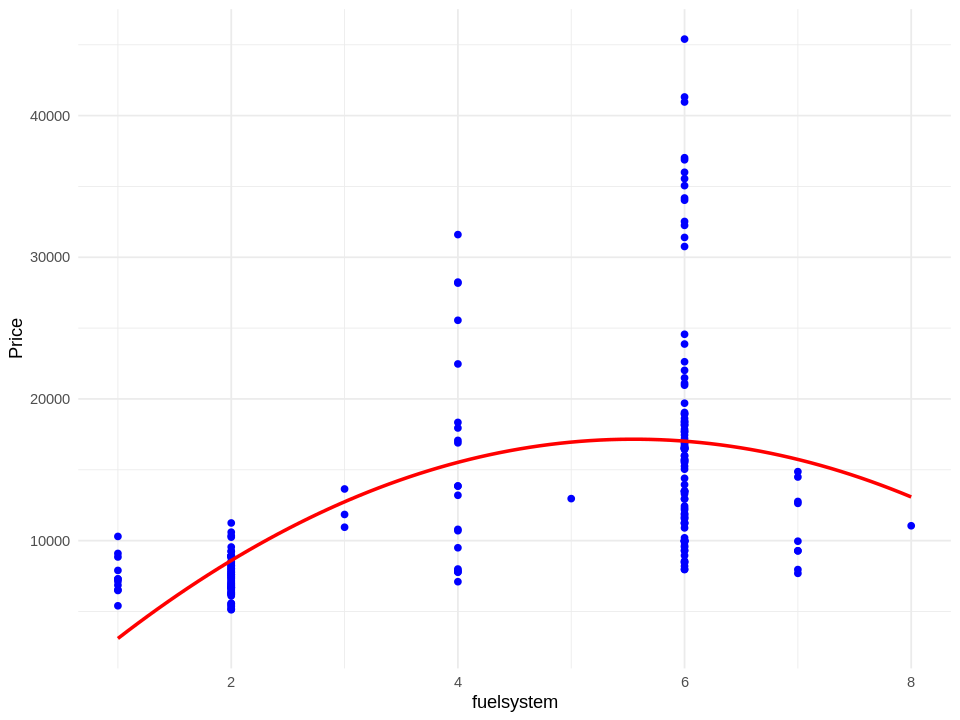

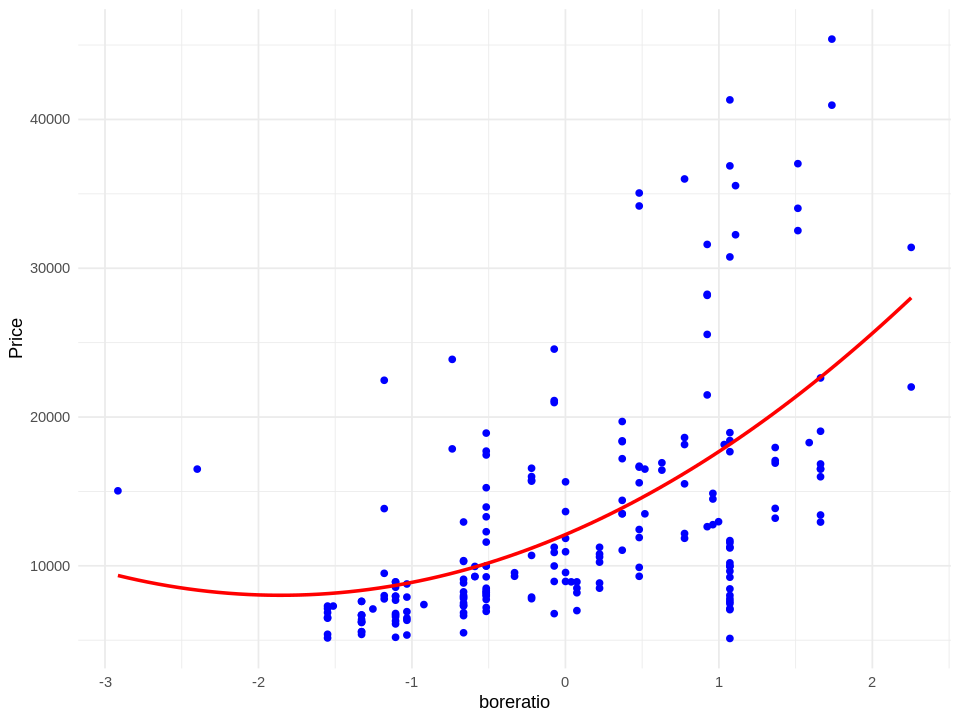

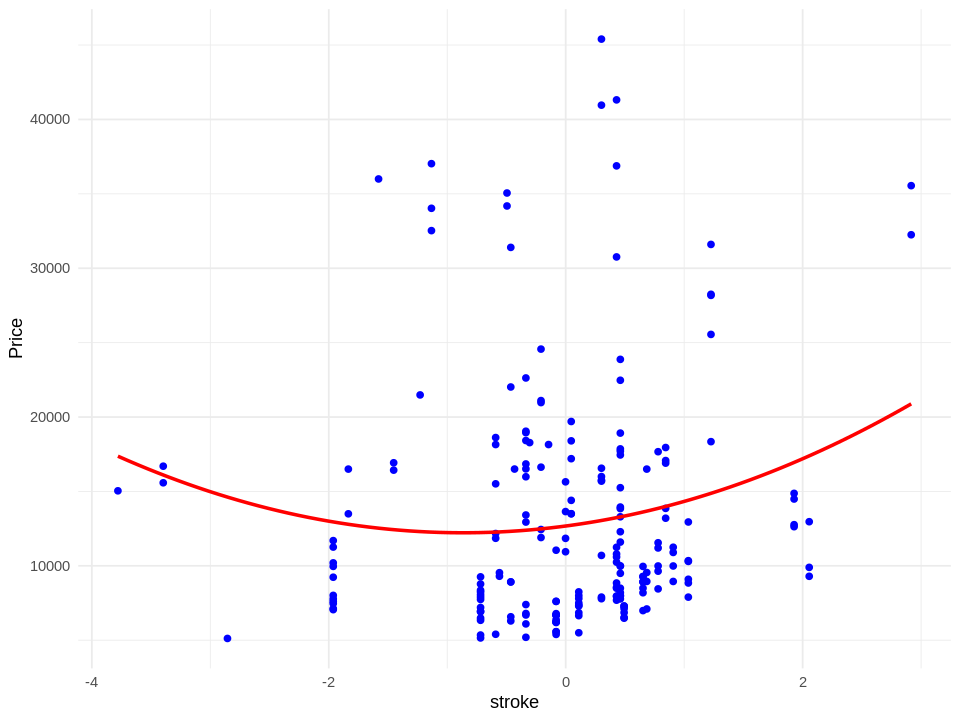

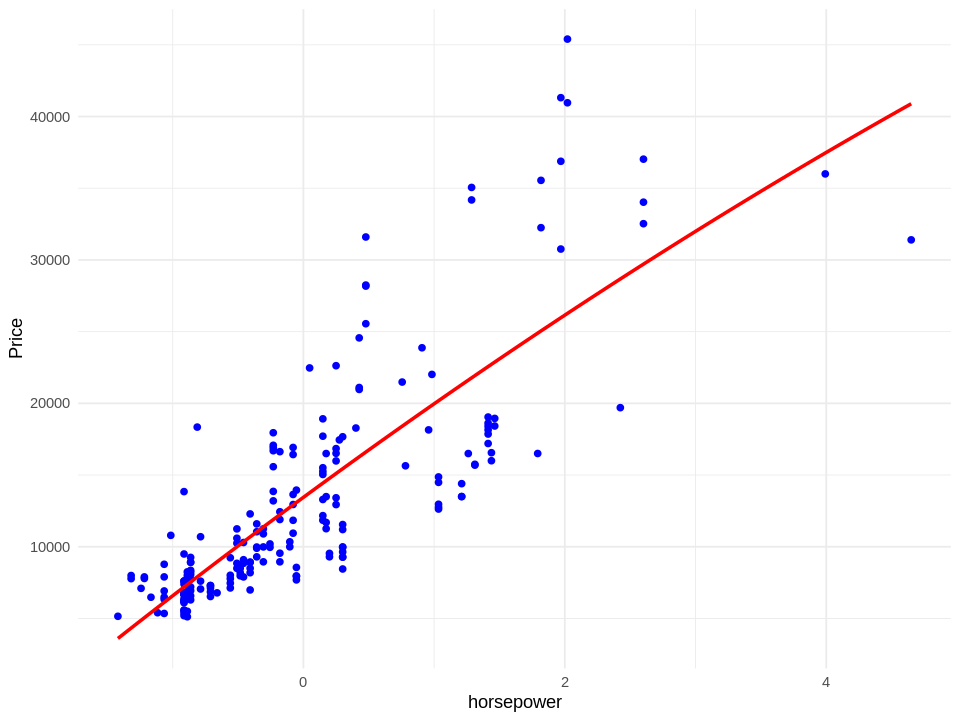

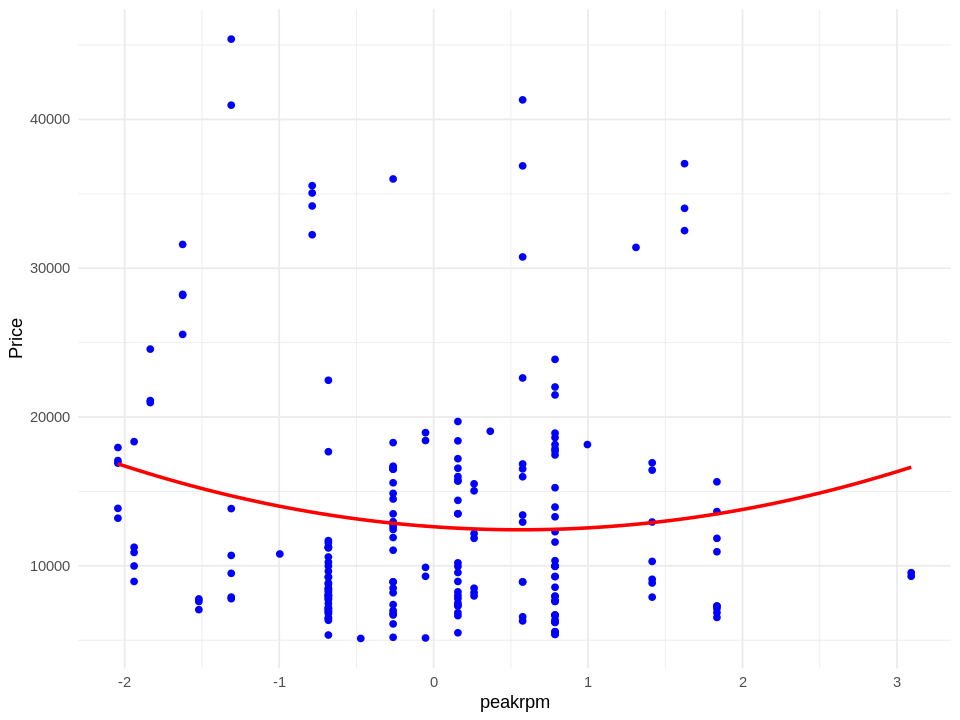

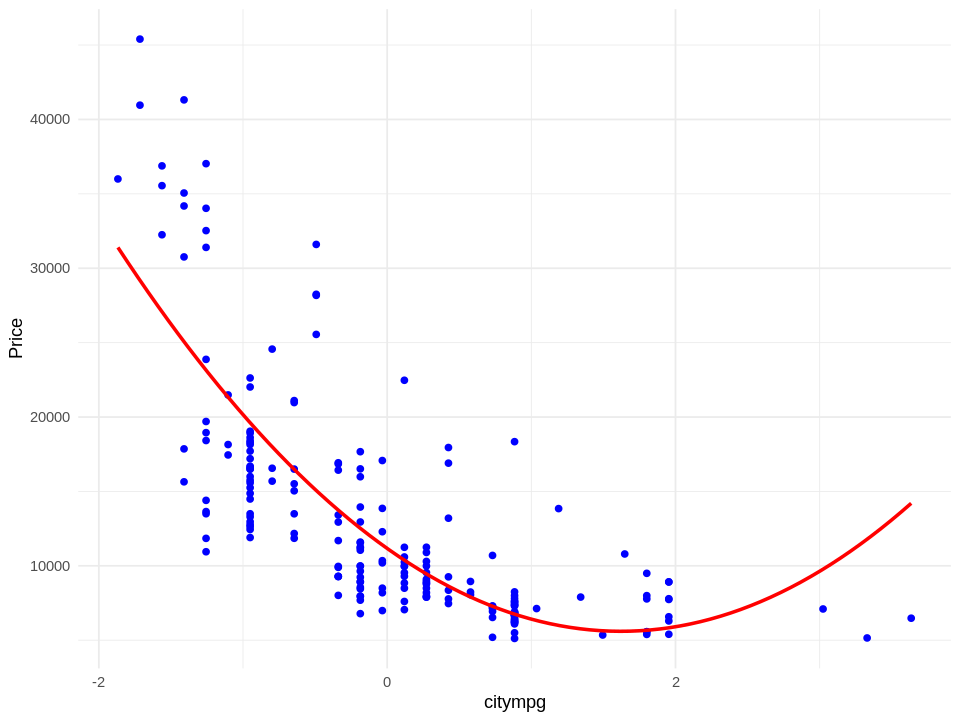

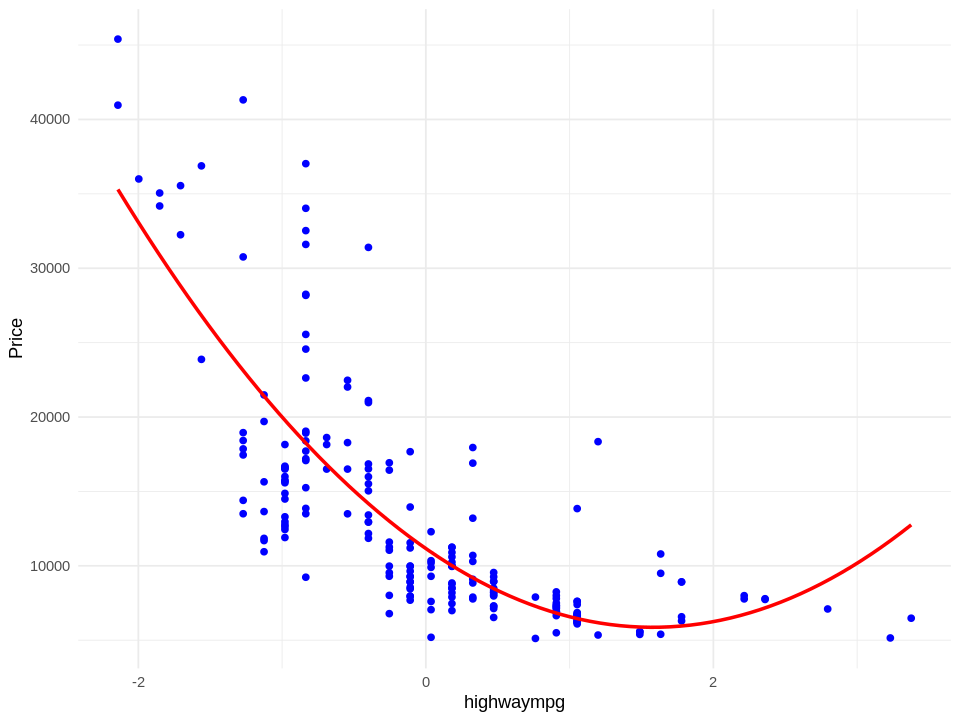

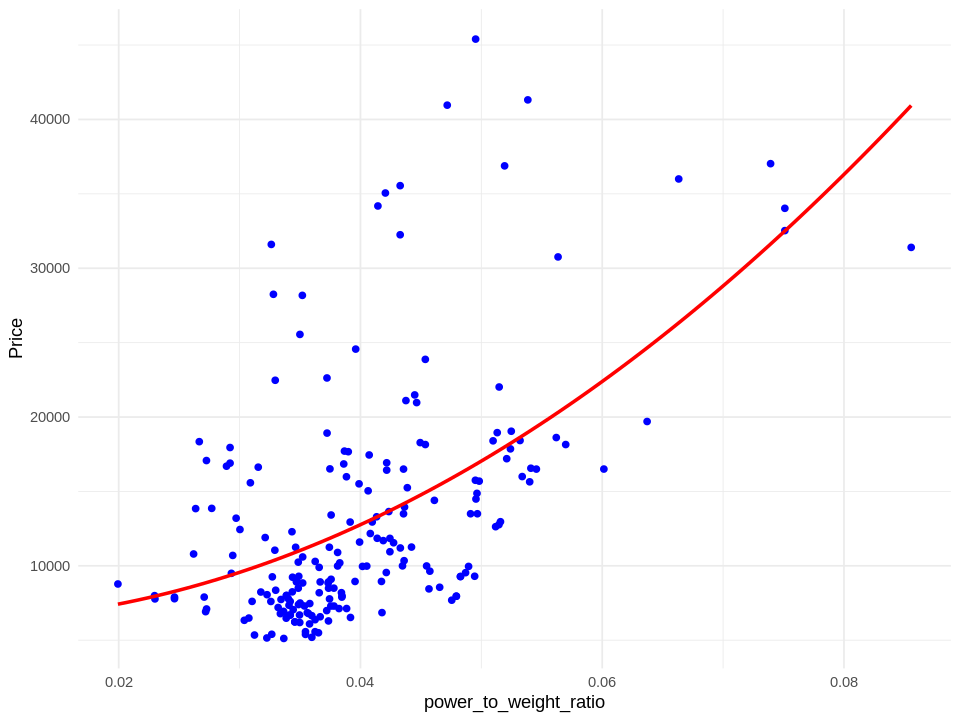

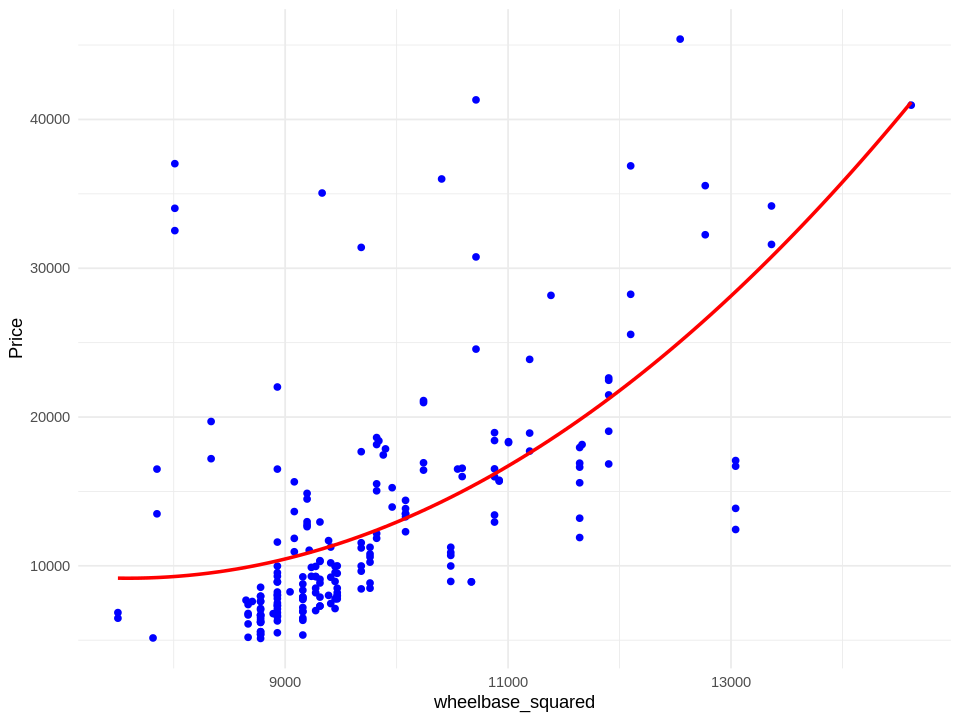

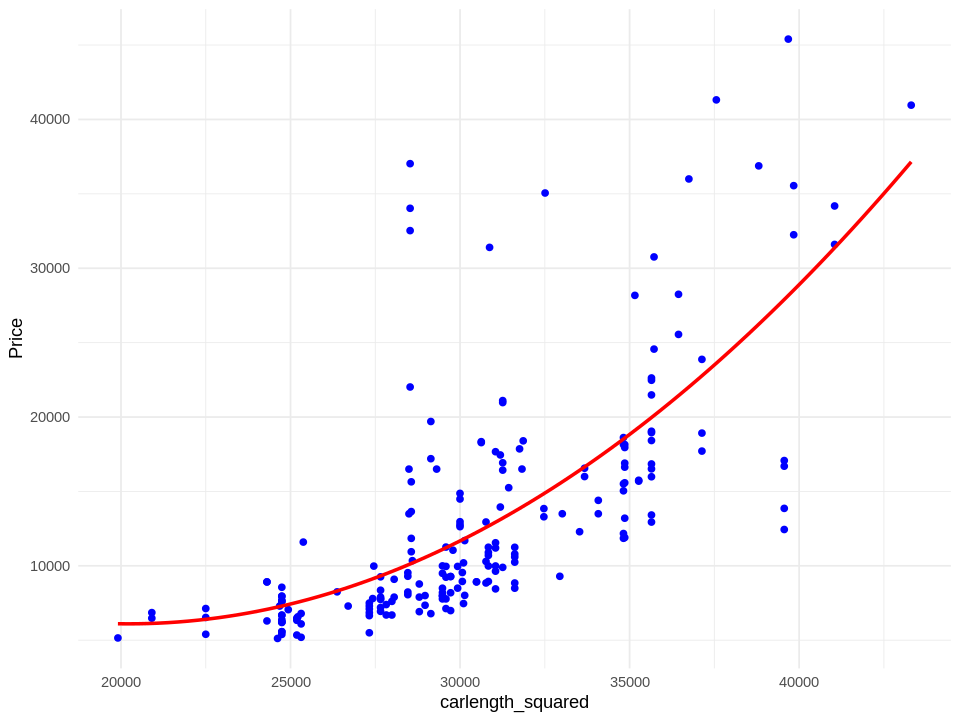

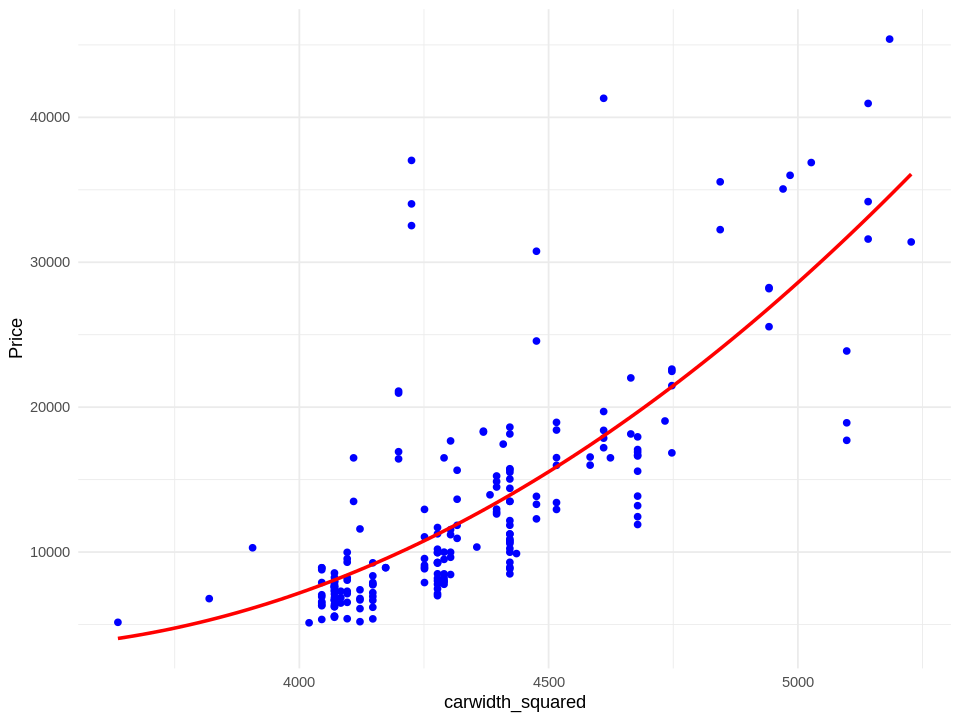

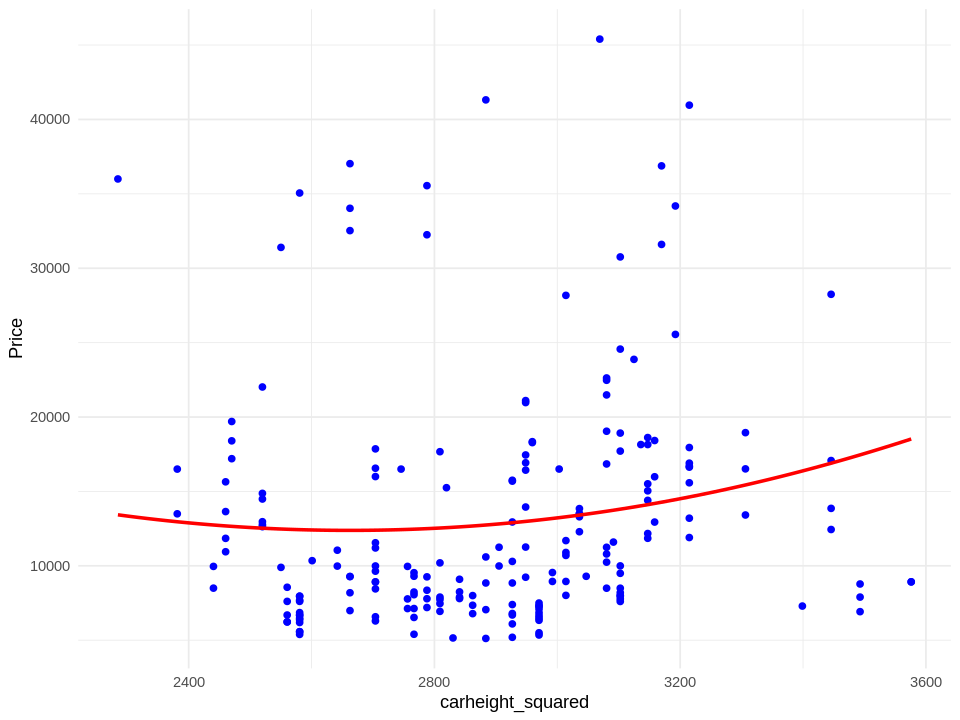

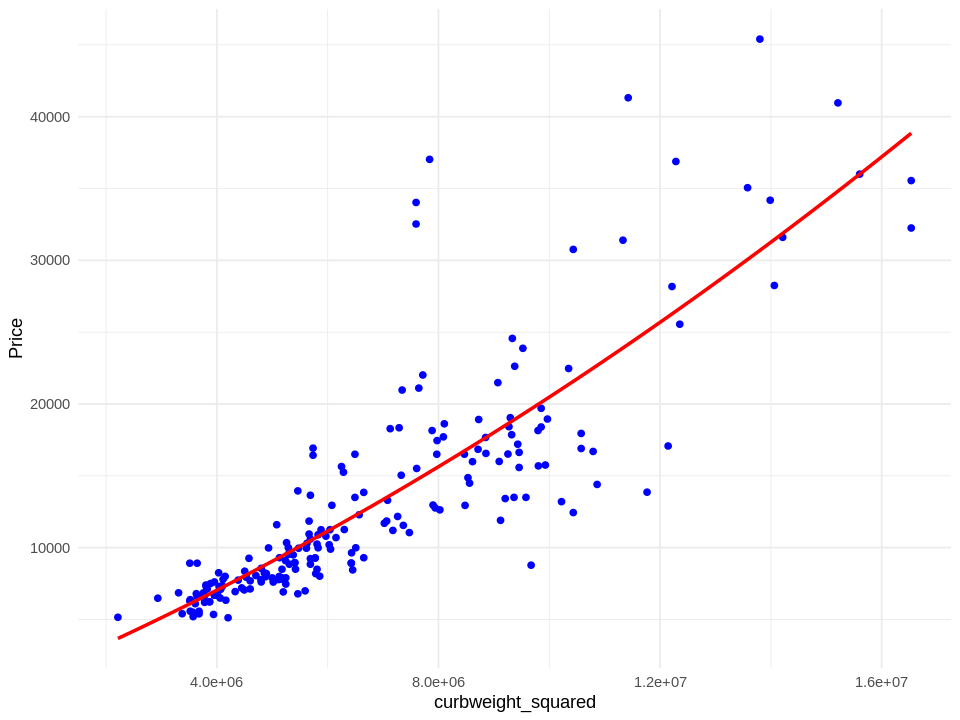

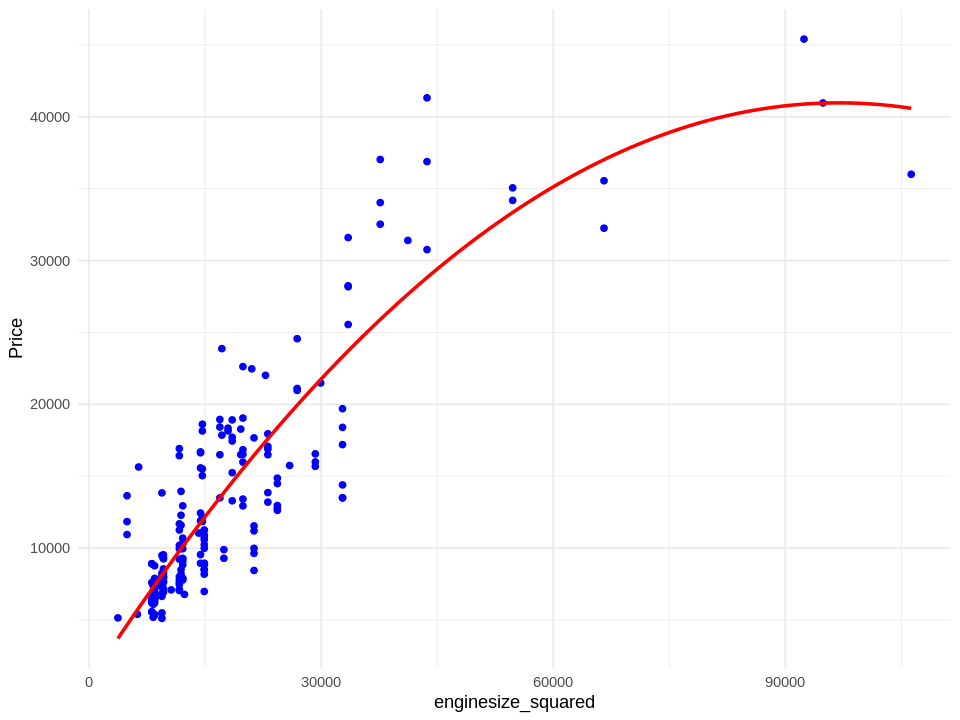

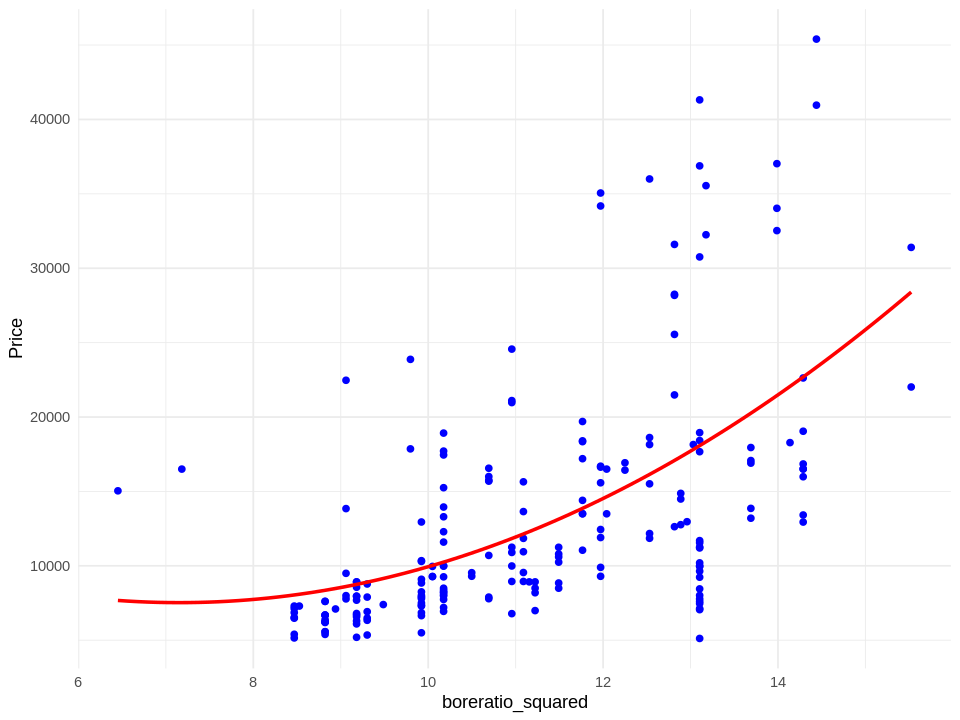

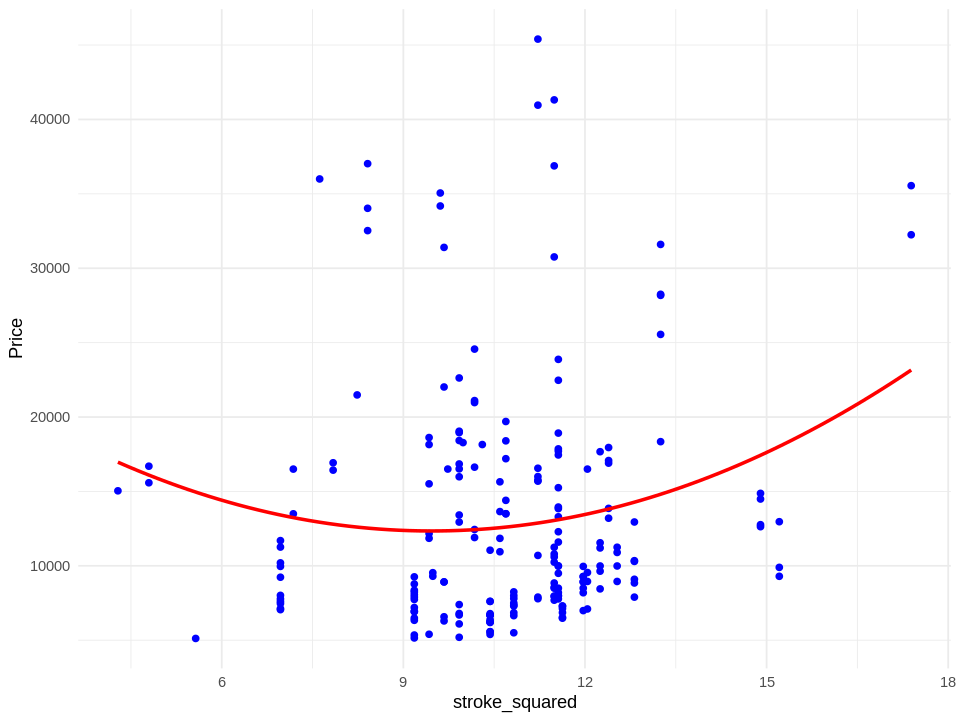

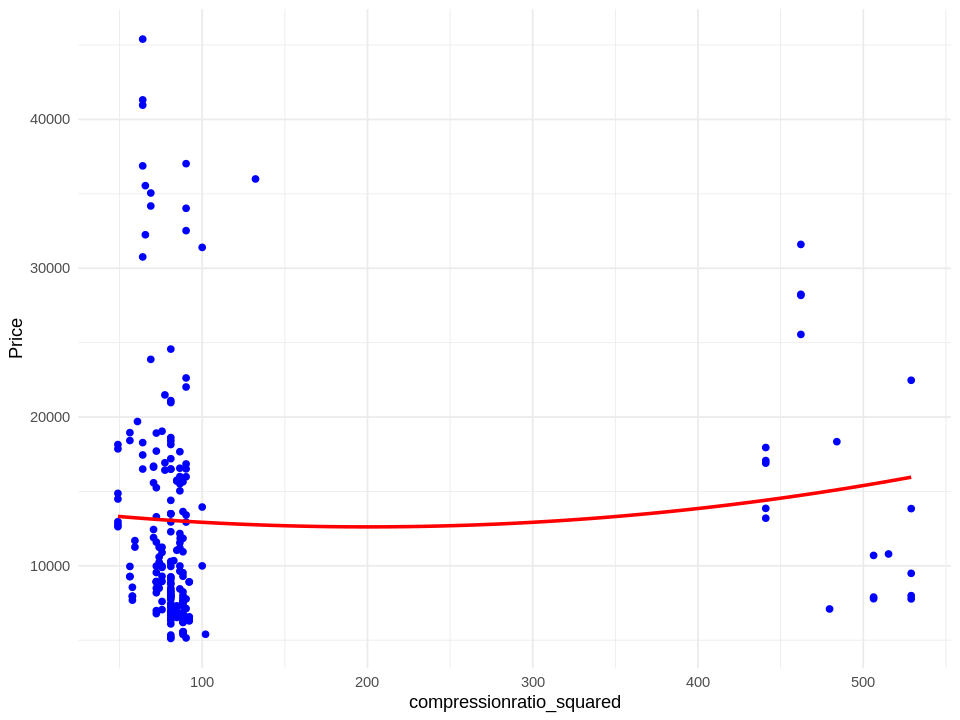

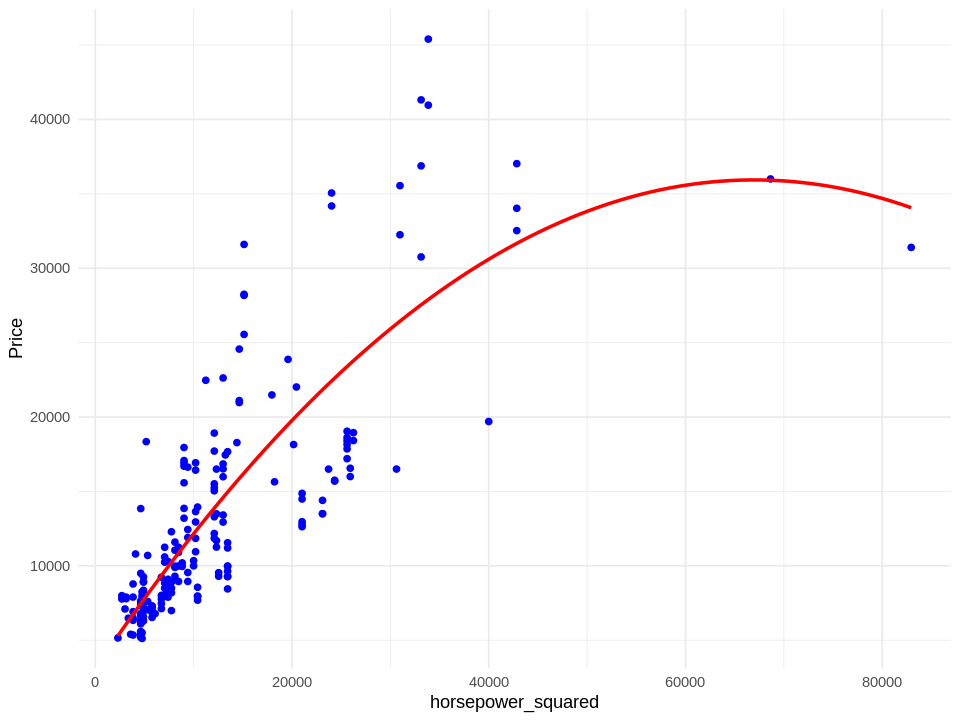

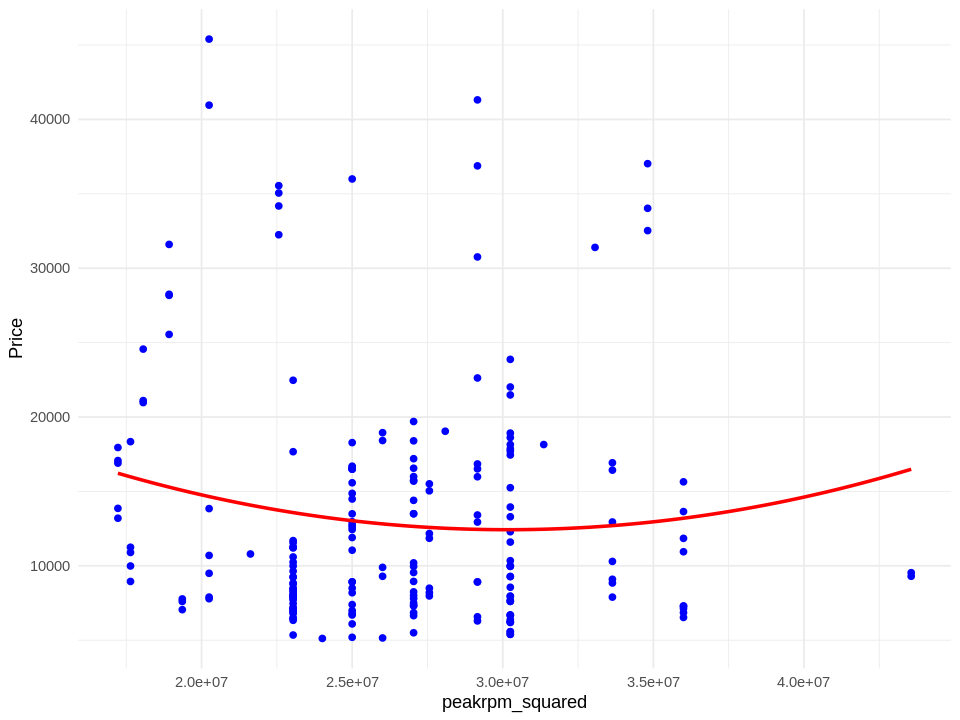

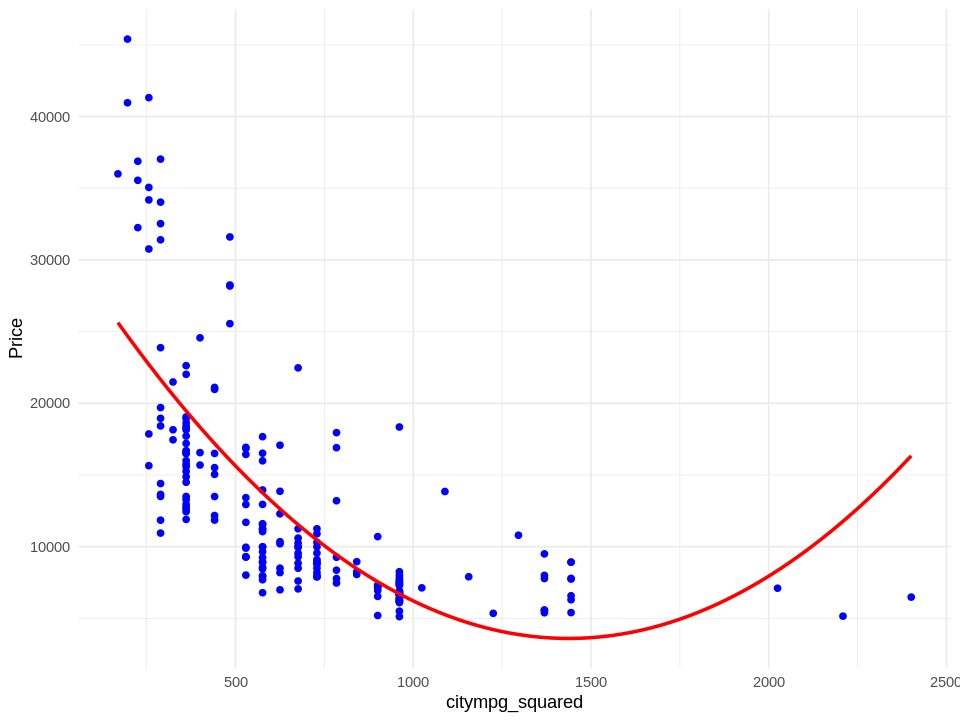

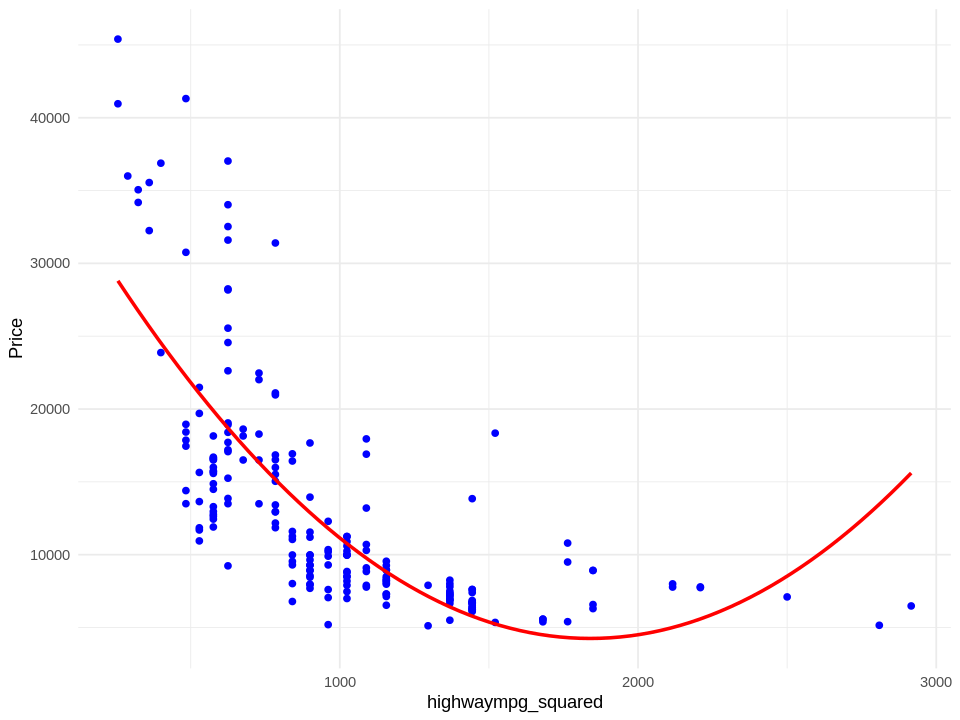

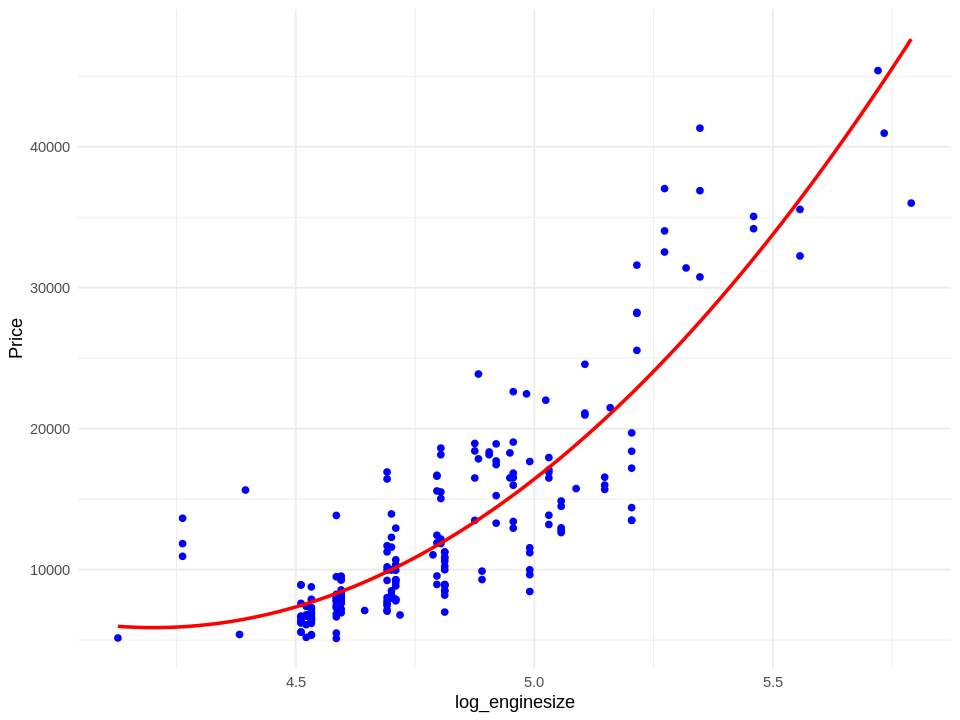

In [ ]:
library(ggplot2)

# Select numerical columns
numerical_cols <- names(car_data)[sapply(car_data, is.numeric)]

# Remove columns not needed for plotting
selected_cols <- numerical_cols[!(numerical_cols %in% c("price", "car_ID", "symboling", "compressionratio"))]

# Calculate number of rows and columns for subplots
num_subplots <- length(selected_cols)
num_cols <- min(3, num_subplots)

# Create scatter plots with polynomial lines
plots_list <- lapply(selected_cols, function(col) {
  ggplot(car_data, aes_string(x = col, y = "price")) +
    geom_point(color = "blue") +
    geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "red") +
    labs(x = col, y = "Price") +
    theme_minimal()
})

# Print each plot separately
for (plot in plots_list) {
  print(plot)
}


## Analysis Results 📊🔍

### Dataset Overview
- The dataset pertains to car prices 👍
- Dataset Shape: Rows = 205, Columns = 26 👊
- No null values found 🚫📛
- No duplicated values found 🚫🔁

### Price Analysis 💰💥
- Average car price: $13,276 💵
- Minimum price: $5,118 💲
- Maximum price: $45,400 💲💲
- The most frequent car brand: Toyota 🚗😊😊

### Fuel Analysis 🚗⛽
- Around 90% of cars use Gas, with an average price lower than Diesel-powered cars. 😨😨
- Approximately 10% of cars use Diesel, with an average price higher than Gas-powered cars. 💥💥

### Drivewheel Analysis 🚗🔧
- Around 82% of cars have Front-Wheel Drive (fwd), which correlates with a lower price. 👍👍
- Turbo cars comprise around 18% and have a lower average price. 😪😪

### Doornumber Analysis 🚪💲
- 56% of cars have 4 doors, while 46% have 2 doors; sports cars maintain a similar average price. 👍👍

### Car Type Analysis 🚗📐
- Sedan car type is the most preferred, while higher-priced types like Convertible and Hardtop are also popular choices. 👍👍

### Engine Type Analysis 🛠️🔍
- The most common engine type is "ohc," correlating with lower prices.
- Increasing the number of cylinders tends to increase the price, though the majority of users stick with 4 cylinders.
- Engine size directly impacts the price.
- Wheelbase, car length, and car width affect the price, but car height doesn't seem to have any significant impact. 😨😨


# Data Pre-Processing and Feature Engineering

In [ ]:
# Split CarName column by space and extract the first word
brand_name <- sapply(strsplit(car_data$CarName, " "), "[", 1)

# Insert the brand_name column at the 4th position
car_data <- cbind(car_data[, 1:3], brand_name, car_data[, 4:ncol(car_data)])

In [ ]:
unique_brand_names <- unique(car_data$brand_name)
unique_brand_names

[1] "alfa-romero" "audi"        "bmw"         "chevrolet"   "dodge"      
 [6] "honda"       "isuzu"       "jaguar"      "maxda"       "mazda"      
[11] "buick"       "mercury"     "mitsubishi"  "Nissan"      "nissan"     
[16] "peugeot"     "plymouth"    "porsche"     "porcshce"    "renault"    
[21] "saab"        "subaru"      "toyota"      "toyouta"     "vokswagen"  
[26] "volkswagen"  "vw"          "volvo"

**There are problems with some brand names.**

In [ ]:
# Replace "vw" and "vokswagen" with "volkswagen"
car_data$brand_name <- ifelse(car_data$brand_name %in% c("vw", "vokswagen"), "volkswagen", car_data$brand_name)

# Replace "maxda" with "mazda"
car_data$brand_name <- ifelse(car_data$brand_name == "maxda", "mazda", car_data$brand_name)

# Replace "toyouta" with "toyota"
car_data$brand_name <- ifelse(car_data$brand_name == "toyouta", "toyota", car_data$brand_name)

# Replace "porcshce" with "porsche"
car_data$brand_name <- ifelse(car_data$brand_name == "porcshce", "porsche", car_data$brand_name)


In [ ]:
unique_brand_names <- unique(car_data$brand_name)
unique_brand_names

[1] "alfa-romero" "audi"        "bmw"         "chevrolet"   "dodge"      
 [6] "honda"       "isuzu"       "jaguar"      "mazda"       "buick"      
[11] "mercury"     "mitsubishi"  "Nissan"      "nissan"      "peugeot"    
[16] "plymouth"    "porsche"     "renault"     "saab"        "subaru"     
[21] "toyota"      "volkswagen"  "volvo"

In [ ]:
# Get the number of unique car brands
num_unique_brands <- length(unique(car_data$brand_name))

# Create the HTML string
html_string <- sprintf("<b><font color='red'>There are %d different car brands in the dataset.</font></b>", num_unique_brands)

# Display the HTML string
IRdisplay::display_html(html_string)

There are 23 different car brands in the dataset.

In [ ]:
car_data

car_ID,symboling,CarName,brand_name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,⋯,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,3,alfa-romero giulia,alfa-romero,2,1,2,1,3,1,⋯,130,6,3.47,2.68,9.00,111,5000,21,27,13495.00
2,3,alfa-romero stelvio,alfa-romero,2,1,2,1,3,1,⋯,130,6,3.47,2.68,9.00,111,5000,21,27,16500.00
3,1,alfa-romero Quadrifoglio,alfa-romero,2,1,2,3,3,1,⋯,152,6,2.68,3.47,9.00,154,5000,19,26,16500.00
4,2,audi 100 ls,audi,2,1,1,4,2,1,⋯,109,6,3.19,3.40,10.00,102,5500,24,30,13950.00
5,2,audi 100ls,audi,2,1,1,4,1,1,⋯,136,6,3.19,3.40,8.00,115,5500,18,22,17450.00
6,2,audi fox,audi,2,1,2,4,2,1,⋯,136,6,3.19,3.40,8.50,110,5500,19,25,15250.00
7,1,audi 100ls,audi,2,1,1,4,2,1,⋯,136,6,3.19,3.40,8.50,110,5500,19,25,17710.00
8,1,audi 5000,audi,2,1,1,5,2,1,⋯,136,6,3.19,3.40,8.50,110,5500,19,25,18920.00
9,1,audi 4000,audi,2,2,1,4,2,1,⋯,131,6,3.13,3.40,8.30,140,5500,17,20,23875.00


In [ ]:
# Define categorical and numerical columns
categorical_columns <- c('fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                          'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand_name')
numerical_columns <- c('wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                        'peakrpm', 'citympg', 'highwaympg')

In [ ]:
# Encoding categorical variables
for (column in categorical_columns) {
  car_data[[column]] <- as.numeric(factor(car_data[[column]]))
}

# Feature engineering
car_data$power_to_weight_ratio <- car_data$horsepower / car_data$curbweight
for (column in numerical_columns) {
  car_data[[paste0(column, "_squared")]] <- car_data[[column]] ^ 2
}
car_data$log_enginesize <- log(car_data$enginesize + 1)

# Feature scaling
numerical_data <- car_data[, numerical_columns]
scaled_numerical_data <- scale(numerical_data)
car_data[, numerical_columns] <- scaled_numerical_data

# Training Model & Prediction

In [ ]:
library(caret)

# Splitting the dataset
set.seed(42)  # Set seed for reproducibility
split <- createDataPartition(car_data$price, p = 0.8, list = FALSE)

X_train <- car_data[split, !(names(car_data) %in% c("price", "CarName"))]
y_train <- car_data$price[split]

X_test <- car_data[-split, !(names(car_data) %in% c("price", "CarName"))]
y_test <- car_data$price[-split]



In [ ]:
install.packages("kknn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘igraph’




In [ ]:
library(kknn)
# Define cross-validation strategy
control <- trainControl(method = "cv", number = 5)

# Define linear regression model
lm_model <- train(x = X_train, y = y_train, method = "lm", trControl = control)

# Define ridge regression model
ridge_model <- train(x = X_train, y = y_train, method = "glmnet", trControl = control,
                     tuneGrid = expand.grid(alpha = 0, lambda = seq(0, 1, by = 0.01)))

# Define lasso regression model
lasso_model <- train(x = X_train, y = y_train, method = "glmnet", trControl = control,
                     tuneGrid = expand.grid(alpha = 1, lambda = seq(0, 1, by = 0.01)))

# Define KNN model
knn_model <- train(x = X_train, y = y_train, method = "kknn", trControl = control)

# Compare model performance
compare_models <- resamples(list(LinearRegression = lm_model, RidgeRegression = ridge_model,
                                 LassoRegression = lasso_model, KNN = knn_model))

# Summarize performance metrics
summary(compare_models)


Attaching package: ‘kknn’


The following object is masked from ‘package:caret’:

    contr.dummy





Call:
summary.resamples(object = compare_models)

Models: LinearRegression, RidgeRegression, LassoRegression, KNN 
Number of resamples: 5 

MAE 
                     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
LinearRegression 1448.980 1670.012 2072.988 1987.530 2245.431 2500.240    0
RidgeRegression  1361.342 1807.662 2164.963 2142.953 2186.463 3194.337    0
LassoRegression  1422.942 1443.955 2132.215 2066.161 2443.133 2888.562    0
KNN              1850.047 1966.881 2047.781 2117.859 2237.387 2487.199    0

RMSE 
                     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
LinearRegression 1951.317 2414.154 3356.703 2984.106 3387.391 3810.966    0
RidgeRegression  1827.925 2458.482 3026.029 3118.903 3271.161 5010.918    0
LassoRegression  1900.200 2166.087 3236.206 3194.553 3773.585 4896.686    0
KNN              2614.039 2673.222 3173.399 3151.320 3556.895 3739.045    0

Rsquared 
                      Min.   1st Qu.    Median      Mean   3rd Qu.      Max.

In [ ]:
# Make predictions
lm_pred <- predict(lm_model, newdata = X_test)
ridge_pred <- predict(ridge_model, newdata = X_test)
lasso_pred <- predict(lasso_model, newdata = X_test)
knn_pred <- predict(knn_model, newdata = X_test)

# Calculate performance metrics
lm_rmse <- sqrt(mean((lm_pred - y_test)^2))
ridge_rmse <- sqrt(mean((ridge_pred - y_test)^2))
lasso_rmse <- sqrt(mean((lasso_pred - y_test)^2))
knn_rmse <- sqrt(mean((knn_pred - y_test)^2))

# Compare RMSE
model_names <- c("Linear Regression", "Ridge Regression", "Lasso Regression", "KNN")
rmse_values <- c(lm_rmse, ridge_rmse, lasso_rmse, knn_rmse)

# Create a dataframe to compare RMSE
rmse_df <- data.frame(Model = model_names, RMSE = rmse_values)

# Print the dataframe
print(rmse_df)

              Model     RMSE
1 Linear Regression 2716.437
2  Ridge Regression 2597.288
3  Lasso Regression 2657.632
4               KNN 3735.636


In [ ]:
# Calculate R-squared for each model
lm_r_squared <- cor(lm_pred, y_test)^2
ridge_r_squared <- cor(ridge_pred, y_test)^2
lasso_r_squared <- cor(lasso_pred, y_test)^2
knn_r_squared <- cor(knn_pred, y_test)^2

# Calculate MSE for each model
lm_mse <- mean((lm_pred - y_test)^2)
ridge_mse <- mean((ridge_pred - y_test)^2)
lasso_mse <- mean((lasso_pred - y_test)^2)
knn_mse <- mean((knn_pred - y_test)^2)

# Print the results
print("Linear Regression:")
print(paste("R-squared:", lm_r_squared))
print(paste("Mean Squared Error:", lm_mse))

print("Ridge Regression:")
print(paste("R-squared:", ridge_r_squared))
print(paste("Mean Squared Error:", ridge_mse))

print("Lasso Regression:")
print(paste("R-squared:", lasso_r_squared))
print(paste("Mean Squared Error:", lasso_mse))

print("KNN:")
print(paste("R-squared:", knn_r_squared))
print(paste("Mean Squared Error:", knn_mse))


[1] "Linear Regression:"
[1] "R-squared: 0.851604680898691"
[1] "Mean Squared Error: 7379027.53949067"
[1] "Ridge Regression:"
[1] "R-squared: 0.857500959630184"
[1] "Mean Squared Error: 6745906.46848047"
[1] "Lasso Regression:"
[1] "R-squared: 0.853233801716999"
[1] "Mean Squared Error: 7063007.45900124"
[1] "KNN:"
[1] "R-squared: 0.727816252599625"
[1] "Mean Squared Error: 13954979.4136392"


# 📊 Model Performance 🚀😃😃

Rejoice, for the R2 Score shines at an impressive 85.7%! 🌟😃

## Model Rankings 🏆😃😃

Ridge Regression: Takes the lead with a solid 85.7% performance. ❤️

So, the best model is Ridge Regression with an 85.7% R2 Score.


# Binary Classification

In [ ]:
# Load the dataset
car_data <- read.csv("CarPrices.csv")

In [ ]:
### Step 4: Task 2 - Binary Classification

# Define the objective and split the data.
# Define the objective: Predict if citympg > 25 (Fuel Efficiency)
car_data$efficient <- ifelse(car_data$citympg > 25, 1, 0)

# Split the data
set.seed(123)
trainIndex <- createDataPartition(car_data$efficient, p = .8,
                                  list = FALSE,
                                  times = 1)
car_train <- car_data[trainIndex, ]
car_test  <- car_data[-trainIndex, ]

In [ ]:
# Logistic Regression
log_model <- glm(efficient ~ horsepower + highwaympg, data = car_train, family = binomial)
summary(log_model)

# KNN
knn_model <- train(efficient ~ horsepower + highwaympg, data = car_train, method = "knn", tuneLength = 5)
print(knn_model)


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = efficient ~ horsepower + highwaympg, family = binomial, 
    data = car_train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -34.36511   12.85226  -2.674  0.00750 ** 
horsepower   -0.04847    0.03524  -1.376  0.16897    
highwaympg    1.24755    0.35786   3.486  0.00049 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 226.47  on 163  degrees of freedom
Residual deviance:  40.97  on 161  degrees of freedom
AIC: 46.97

Number of Fisher Scoring iterations: 9


Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


k-Nearest Neighbors 

164 samples
  2 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 164, 164, 164, 164, 164, 164, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE       
   5  0.2022029  0.8354938  0.06955485
   7  0.2162198  0.8141800  0.08737990
   9  0.2218967  0.8053906  0.09627814
  11  0.2339881  0.7857320  0.10927240
  13  0.2390698  0.7768549  0.11668179

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 5.


In [ ]:
# Evaluate models on test set
test_x <- car_test %>% select(horsepower, highwaympg)
test_y <- car_test$efficient

In [ ]:
# Logistic Regression Prediction
log_pred <- predict(log_model, test_x, type = "response")
log_pred_class <- ifelse(log_pred > 0.5, 1, 0)
log_accuracy <- mean(log_pred_class == test_y)

# KNN Prediction
knn_pred <- predict(knn_model, car_test)
knn_accuracy <- mean(knn_pred == test_y)

# Compare Accuracy
data.frame(
  Model = c("Logistic Regression", "KNN"),
  Accuracy = c(log_accuracy, knn_accuracy)
)


Model,Accuracy
<chr>,<dbl>
Logistic Regression,0.9756098
KNN,0.8780488
